<a href="https://colab.research.google.com/github/saritmaitra/ATM-cash-withdrawal-forecast/blob/master/ATM_cash_withdrawal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pyforest
from pyforest import *
import datetime, pickle, copy
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import matplotlib.pyplot as plt
%matplotlib inline  
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()
#plt.style.use('fivethirtyeight')
import math
from scipy import stats
#from google.colab import files
from sklearn.metrics import mean_squared_error
import lightgbm as lgb 
from lightgbm import LGBMRegressor
from sklearn import metrics
from time import time
from sklearn.model_selection import cross_val_score
#!pip install catboost 
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import scipy
import pickle
from joblib import Parallel, delayed
import joblib
import numpy as np
import lightgbm as lgb 
from lightgbm import LGBMRegressor
from sklearn import metrics
from time import time
from sklearn.model_selection import cross_val_score
#!pip install catboost
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [3]:
#!pip install ngboost
from sklearn.linear_model import LinearRegression
from ngboost import NGBRegressor
from ngboost.learners import default_tree_learner
from ngboost.distns import Normal
from ngboost.scores import MLE

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from scipy import stats
#!pip install ppscore
import ppscore as pps
from sklearn.preprocessing import MinMaxScaler

# ATM Cash demand forecast

In [7]:
#from google.colab import files
#uploaded = files.upload()

In [5]:
df_raw = pd.read_csv("processed_atm4.csv")
df_raw

,DISTRICTNAME,BRANCHNAME,TXN_DATE,TERMINAL_ID,trxn_year,trxn_month,trxn_week,trxn_date,date,NEW_WITHDRAWAL,week_mean_y,prv_week,HOLIDAY,hol_sequence,month_mean,prv_month,Pr_mnt_crrs_week
0,ADAMA,ADAMA INDUSTRIAL PARKS,2020-07-03,AAD00154,2020,7,27,4,Friday,34820.0,30533.333333,38022.540144,W,WWW,33467.777778,37405.359332,38025.029240
1,ADAMA,ADAMA INDUSTRIAL PARKS,2020-07-04,AAD00154,2020,7,27,5,Saturday,36950.0,30533.333333,38022.540144,W,WWH,33467.777778,37405.359332,38025.029240
2,ADAMA,ADAMA INDUSTRIAL PARKS,2020-07-05,AAD00154,2020,7,27,6,Sunday,19830.0,30533.333333,38022.540144,H,WHW,33467.777778,37405.359332,38025.029240
3,ADAMA,ADAMA INDUSTRIAL PARKS,2020-07-06,AAD00154,2020,7,28,0,Monday,35640.0,50337.142857,30533.333333,W,HWW,33467.777778,37405.359332,38025.029240
4,ADAMA,ADAMA INDUSTRIAL PARKS,2020-07-07,AAD00154,2020,7,28,1,Tuesday,19830.0,50337.142857,30533.333333,W,WWW,33467.777778,37405.359332,30533.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516817,YEKA,Yeka Terara,2022-08-27,AYK00109,2022,8,34,5,Saturday,349600.0,381828.571429,252128.571429,W,WWH,306746.428571,256996.666667,381828.571429
1516818,YEKA,Yeka Terara,2022-08-28,AYK00109,2022,8,34,6,Sunday,680500.0,381828.571429,252128.571429,H,WHW,306746.428571,256996.666667,381828.571429
1516819,YEKA,Yeka Terara,2022-08-29,AYK00109,2022,8,35,0,Monday,494500.0,391466.666667,381828.571429,W,HWW,306746.428571,256996.666667,381828.571429
1516820,YEKA,Yeka Terara,2022-08-30,AYK00109,2022,8,35,1,Tuesday,460800.0,391466.666667,381828.571429,W,WWW,306746.428571,256996.666667,381828.571429


In [6]:
print(min(df_raw['TXN_DATE']))
print(max(df_raw['TXN_DATE']))

2020-07-01
2022-08-31


In [7]:
# Import data 
df = pd.read_csv("processed_atm4.csv")
df

,DISTRICTNAME,BRANCHNAME,TXN_DATE,TERMINAL_ID,trxn_year,trxn_month,trxn_week,trxn_date,date,NEW_WITHDRAWAL,week_mean_y,prv_week,HOLIDAY,hol_sequence,month_mean,prv_month,Pr_mnt_crrs_week
0,ADAMA,ADAMA INDUSTRIAL PARKS,2020-07-03,AAD00154,2020,7,27,4,Friday,34820.0,30533.333333,38022.540144,W,WWW,33467.777778,37405.359332,38025.029240
1,ADAMA,ADAMA INDUSTRIAL PARKS,2020-07-04,AAD00154,2020,7,27,5,Saturday,36950.0,30533.333333,38022.540144,W,WWH,33467.777778,37405.359332,38025.029240
2,ADAMA,ADAMA INDUSTRIAL PARKS,2020-07-05,AAD00154,2020,7,27,6,Sunday,19830.0,30533.333333,38022.540144,H,WHW,33467.777778,37405.359332,38025.029240
3,ADAMA,ADAMA INDUSTRIAL PARKS,2020-07-06,AAD00154,2020,7,28,0,Monday,35640.0,50337.142857,30533.333333,W,HWW,33467.777778,37405.359332,38025.029240
4,ADAMA,ADAMA INDUSTRIAL PARKS,2020-07-07,AAD00154,2020,7,28,1,Tuesday,19830.0,50337.142857,30533.333333,W,WWW,33467.777778,37405.359332,30533.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516817,YEKA,Yeka Terara,2022-08-27,AYK00109,2022,8,34,5,Saturday,349600.0,381828.571429,252128.571429,W,WWH,306746.428571,256996.666667,381828.571429
1516818,YEKA,Yeka Terara,2022-08-28,AYK00109,2022,8,34,6,Sunday,680500.0,381828.571429,252128.571429,H,WHW,306746.428571,256996.666667,381828.571429
1516819,YEKA,Yeka Terara,2022-08-29,AYK00109,2022,8,35,0,Monday,494500.0,391466.666667,381828.571429,W,HWW,306746.428571,256996.666667,381828.571429
1516820,YEKA,Yeka Terara,2022-08-30,AYK00109,2022,8,35,1,Tuesday,460800.0,391466.666667,381828.571429,W,WWW,306746.428571,256996.666667,381828.571429


In [8]:
df['DISTRICTNAME'].nunique()

31

In [9]:
df.dtypes

DISTRICTNAME         object
BRANCHNAME           object
TXN_DATE             object
TERMINAL_ID          object
trxn_year             int64
trxn_month            int64
trxn_week             int64
trxn_date             int64
date                 object
NEW_WITHDRAWAL      float64
week_mean_y         float64
prv_week            float64
HOLIDAY              object
hol_sequence         object
month_mean          float64
prv_month           float64
Pr_mnt_crrs_week    float64
dtype: object

In [10]:
df.isna().values.any()

False

In [11]:
cat_columns = df.select_dtypes(['object']).columns

In [12]:
cat_columns

Index(['DISTRICTNAME', 'BRANCHNAME', 'TXN_DATE', 'TERMINAL_ID', 'date', 'HOLIDAY', 'hol_sequence'], dtype='object')

In [13]:
#df[cat_columns] = df[cat_columns].cat.codes

In [14]:
#for col_name in df.columns:
#    if(df[col_name].dtype == 'object'):
#        df[col_name]= df[col_name].astype('category')
#        df[col_name] = df[col_name].cat.codes

In [15]:
df['DISTRICTNAME']= df['DISTRICTNAME'].astype('category')
df['District'] = df['DISTRICTNAME'].cat.codes

In [16]:
df['BRANCHNAME']= df['BRANCHNAME'].astype('category')
df['Branch'] = df['BRANCHNAME'].cat.codes

In [17]:
df['TERMINAL_ID']= df['TERMINAL_ID'].astype('category')
df['Terminal'] = df['TERMINAL_ID'].cat.codes

In [18]:
df['HOLIDAY']= df['HOLIDAY'].astype('category')
df['holiday'] = df['HOLIDAY'].cat.codes

In [19]:
df['hol_sequence']= df['hol_sequence'].astype('category')
df['hol_seq'] = df['hol_sequence'].cat.codes

In [20]:
max(df['Terminal'])

3061

In [21]:
df_raw['TERMINAL_ID'].nunique()

3062

In [22]:
df= df.drop(columns='week_mean_y')

In [23]:
df.rename(columns={'NEW_WITHDRAWAL':'WITHDRAWAL'}, inplace=True)

In [24]:
df.shape

(1516822, 21)

In [25]:
df.head()

,DISTRICTNAME,BRANCHNAME,TXN_DATE,TERMINAL_ID,trxn_year,trxn_month,trxn_week,trxn_date,date,WITHDRAWAL,prv_week,HOLIDAY,hol_sequence,month_mean,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,holiday,hol_seq
0,ADAMA,ADAMA INDUSTRIAL PARKS,2020-07-03,AAD00154,2020,7,27,4,Friday,34820.0,38022.540144,W,WWW,33467.777778,37405.359332,38025.029240,0,16,83,1,7
1,ADAMA,ADAMA INDUSTRIAL PARKS,2020-07-04,AAD00154,2020,7,27,5,Saturday,36950.0,38022.540144,W,WWH,33467.777778,37405.359332,38025.029240,0,16,83,1,6
2,ADAMA,ADAMA INDUSTRIAL PARKS,2020-07-05,AAD00154,2020,7,27,6,Sunday,19830.0,38022.540144,H,WHW,33467.777778,37405.359332,38025.029240,0,16,83,0,5
3,ADAMA,ADAMA INDUSTRIAL PARKS,2020-07-06,AAD00154,2020,7,28,0,Monday,35640.0,30533.333333,W,HWW,33467.777778,37405.359332,38025.029240,0,16,83,1,3
4,ADAMA,ADAMA INDUSTRIAL PARKS,2020-07-07,AAD00154,2020,7,28,1,Tuesday,19830.0,30533.333333,W,WWW,33467.777778,37405.359332,30533.333333,0,16,83,1,7


In [26]:
df=df.rename(columns={'week_mean_x':'week_mean'})

In [27]:
data = df.set_index('TXN_DATE')
data.head()

,DISTRICTNAME,BRANCHNAME,TERMINAL_ID,trxn_year,trxn_month,trxn_week,trxn_date,date,WITHDRAWAL,prv_week,HOLIDAY,hol_sequence,month_mean,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,holiday,hol_seq
TXN_DATE,,,,,,,,,,,,,,,,,,,,
2020-07-03,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,4,Friday,34820.0,38022.540144,W,WWW,33467.777778,37405.359332,38025.029240,0,16,83,1,7
2020-07-04,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,5,Saturday,36950.0,38022.540144,W,WWH,33467.777778,37405.359332,38025.029240,0,16,83,1,6
2020-07-05,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,6,Sunday,19830.0,38022.540144,H,WHW,33467.777778,37405.359332,38025.029240,0,16,83,0,5
2020-07-06,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,0,Monday,35640.0,30533.333333,W,HWW,33467.777778,37405.359332,38025.029240,0,16,83,1,3
2020-07-07,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,1,Tuesday,19830.0,30533.333333,W,WWW,33467.777778,37405.359332,30533.333333,0,16,83,1,7


In [28]:
min(data['trxn_year'])

2020

In [29]:
data[['WITHDRAWAL']][2021:]

,WITHDRAWAL
TXN_DATE,
2021-08-08,237550.0
2021-08-09,322000.0
2021-08-10,242350.0
2021-08-11,209000.0
2021-08-12,108900.0
...,...
2022-08-27,349600.0
2022-08-28,680500.0
2022-08-29,494500.0


In [30]:
data['WITHDRAWAL'] [2021:]

TXN_DATE
2021-08-08    237550.0
2021-08-09    322000.0
2021-08-10    242350.0
2021-08-11    209000.0
2021-08-12    108900.0
                ...   
2022-08-27    349600.0
2022-08-28    680500.0
2022-08-29    494500.0
2022-08-30    460800.0
2022-08-31    219100.0
Name: WITHDRAWAL, Length: 1514801, dtype: float64

In [31]:
data.dtypes

DISTRICTNAME        category
BRANCHNAME          category
TERMINAL_ID         category
trxn_year              int64
trxn_month             int64
trxn_week              int64
trxn_date              int64
date                  object
WITHDRAWAL           float64
prv_week             float64
HOLIDAY             category
hol_sequence        category
month_mean           float64
prv_month            float64
Pr_mnt_crrs_week     float64
District                int8
Branch                 int16
Terminal               int16
holiday                 int8
hol_seq                 int8
dtype: object

In [32]:
data[data['BRANCHNAME']=='Finfine']

,DISTRICTNAME,BRANCHNAME,TERMINAL_ID,trxn_year,trxn_month,trxn_week,trxn_date,date,WITHDRAWAL,prv_week,HOLIDAY,hol_sequence,month_mean,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,holiday,hol_seq
TXN_DATE,,,,,,,,,,,,,,,,,,,,
2021-04-29,KIRKOS,Finfine,AKR00044,2021,4,17,3,Thursday,275950.0,211000.567842,W,WWH,275950.000000,220046.462990,210979.117647,17,638,1831,1,6
2021-05-01,KIRKOS,Finfine,AKR00044,2021,5,17,5,Saturday,286650.0,211000.567842,H,WHH,190680.645161,275950.000000,210979.117647,17,638,1831,0,4
2021-05-02,KIRKOS,Finfine,AKR00044,2021,5,17,6,Sunday,137200.0,211000.567842,H,HHW,190680.645161,275950.000000,210979.117647,17,638,1831,0,1
2021-05-03,KIRKOS,Finfine,AKR00044,2021,5,18,0,Monday,230250.0,233266.666667,W,HWW,190680.645161,275950.000000,210979.117647,17,638,1831,1,3
2021-05-04,KIRKOS,Finfine,AKR00044,2021,5,18,1,Tuesday,230150.0,233266.666667,W,WWH,190680.645161,275950.000000,233266.666667,17,638,1831,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,KIRKOS,Finfine,AKR00049,2022,8,34,5,Saturday,547650.0,297910.000000,W,WWH,346558.387097,365116.333333,388164.285714,17,638,1835,1,6
2022-08-28,KIRKOS,Finfine,AKR00049,2022,8,34,6,Sunday,251100.0,297910.000000,H,WHW,346558.387097,365116.333333,388164.285714,17,638,1835,0,5
2022-08-29,KIRKOS,Finfine,AKR00049,2022,8,35,0,Monday,566000.0,388164.285714,W,HWW,346558.387097,365116.333333,388164.285714,17,638,1835,1,3


In [33]:
#data1 = data.loc[data['trxn_year']==2021]

In [34]:
#data1.head()

In [35]:
#import matplotlib as mpl
#mpl.rcParams['agg.path.chunksize'] =2_000_0


In [36]:
#dff= pd.read_csv('atm_data.csv')

In [37]:
#dff.shape

In [38]:
finfin=data[data['TERMINAL_ID']=='AKR00049']
min(finfin['trxn_year'])

2021

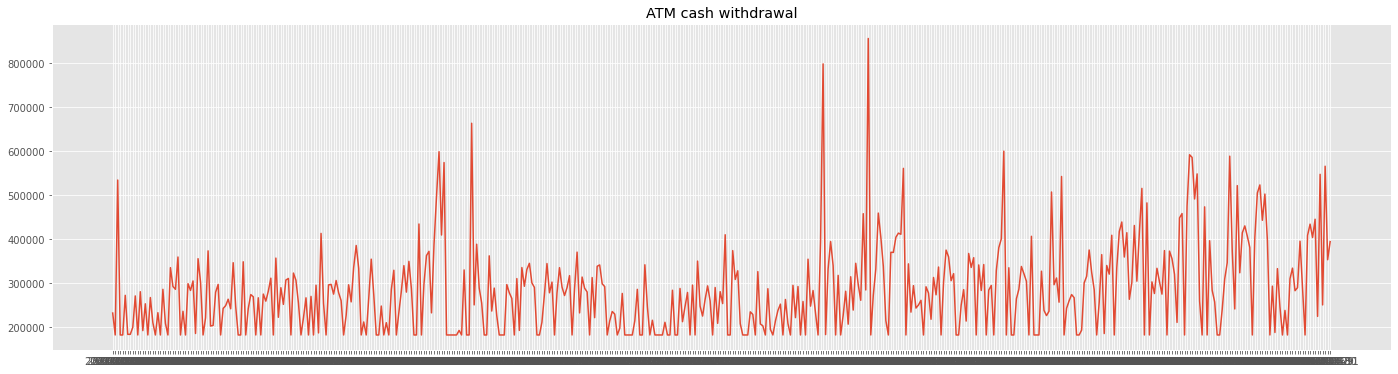

In [39]:
plt.figure(figsize=(24,6))
plt.style.use('ggplot')
plt.plot(data[data['TERMINAL_ID']=='AKR00049']['WITHDRAWAL'])
plt.title('ATM cash withdrawal')

mpl.rcParams['agg.path.chunksize'] = 500

plt.show()

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516822 entries, 2020-07-03 to 2022-08-31
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   DISTRICTNAME      1516822 non-null  category
 1   BRANCHNAME        1516822 non-null  category
 2   TERMINAL_ID       1516822 non-null  category
 3   trxn_year         1516822 non-null  int64   
 4   trxn_month        1516822 non-null  int64   
 5   trxn_week         1516822 non-null  int64   
 6   trxn_date         1516822 non-null  int64   
 7   date              1516822 non-null  object  
 8   WITHDRAWAL        1516822 non-null  float64 
 9   prv_week          1516822 non-null  float64 
 10  HOLIDAY           1516822 non-null  category
 11  hol_sequence      1516822 non-null  category
 12  month_mean        1516822 non-null  float64 
 13  prv_month         1516822 non-null  float64 
 14  Pr_mnt_crrs_week  1516822 non-null  float64 
 15  District          1516822

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516822 entries, 2020-07-03 to 2022-08-31
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   DISTRICTNAME      1516822 non-null  category
 1   BRANCHNAME        1516822 non-null  category
 2   TERMINAL_ID       1516822 non-null  category
 3   trxn_year         1516822 non-null  int64   
 4   trxn_month        1516822 non-null  int64   
 5   trxn_week         1516822 non-null  int64   
 6   trxn_date         1516822 non-null  int64   
 7   date              1516822 non-null  object  
 8   WITHDRAWAL        1516822 non-null  float64 
 9   prv_week          1516822 non-null  float64 
 10  HOLIDAY           1516822 non-null  category
 11  hol_sequence      1516822 non-null  category
 12  month_mean        1516822 non-null  float64 
 13  prv_month         1516822 non-null  float64 
 14  Pr_mnt_crrs_week  1516822 non-null  float64 
 15  District          1516822

### Target analysis
Target distribution is skewed and can be seen in the plots below - this is generally not a good thing. So we will need to adjust it so its normally distributed. This can be achieved with a log transform or something more powerful like box cox. On the diagram below, the left pane shows the original (skewed) data. The right pane show the transformed data.

In [42]:
data.head(100)

,DISTRICTNAME,BRANCHNAME,TERMINAL_ID,trxn_year,trxn_month,trxn_week,trxn_date,date,WITHDRAWAL,prv_week,HOLIDAY,hol_sequence,month_mean,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,holiday,hol_seq
TXN_DATE,,,,,,,,,,,,,,,,,,,,
2020-07-03,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,4,Friday,34820.0,38022.540144,W,WWW,33467.777778,37405.359332,38025.029240,0,16,83,1,7
2020-07-04,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,5,Saturday,36950.0,38022.540144,W,WWH,33467.777778,37405.359332,38025.029240,0,16,83,1,6
2020-07-05,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,6,Sunday,19830.0,38022.540144,H,WHW,33467.777778,37405.359332,38025.029240,0,16,83,0,5
2020-07-06,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,0,Monday,35640.0,30533.333333,W,HWW,33467.777778,37405.359332,38025.029240,0,16,83,1,3
2020-07-07,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,1,Tuesday,19830.0,30533.333333,W,WWW,33467.777778,37405.359332,30533.333333,0,16,83,1,7
2020-07-08,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,2,Wednesday,19830.0,30533.333333,W,WWW,33467.777778,37405.359332,30533.333333,0,16,83,1,7
2020-07-09,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,3,Thursday,26540.0,30533.333333,W,WWW,33467.777778,37405.359332,30533.333333,0,16,83,1,7
2020-07-10,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,4,Friday,172040.0,30533.333333,W,WWW,33467.777778,37405.359332,50337.142857,0,16,83,1,7
2020-07-11,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,5,Saturday,58650.0,30533.333333,W,WWH,33467.777778,37405.359332,50337.142857,0,16,83,1,6


In [43]:
data['prv_week'].mean()

239760.3678543002

In [44]:
dataz = data.loc[(data['trxn_year']==2021) & (data['prv_week'].isnull())]

In [45]:
dataz

,DISTRICTNAME,BRANCHNAME,TERMINAL_ID,trxn_year,trxn_month,trxn_week,trxn_date,date,WITHDRAWAL,prv_week,HOLIDAY,hol_sequence,month_mean,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,holiday,hol_seq
TXN_DATE,,,,,,,,,,,,,,,,,,,,


In [46]:
datay = data.loc[(data['trxn_year']==2022) & (data['prv_week'].isnull()) & (data['trxn_week']==1)]

In [47]:
datay

,DISTRICTNAME,BRANCHNAME,TERMINAL_ID,trxn_year,trxn_month,trxn_week,trxn_date,date,WITHDRAWAL,prv_week,HOLIDAY,hol_sequence,month_mean,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,holiday,hol_seq
TXN_DATE,,,,,,,,,,,,,,,,,,,,


In [48]:
datay.shape

(0, 20)

In [49]:
data['TERMINAL_ID']

TXN_DATE
2020-07-03    AAD00154
2020-07-04    AAD00154
2020-07-05    AAD00154
2020-07-06    AAD00154
2020-07-07    AAD00154
                ...   
2022-08-27    AYK00109
2022-08-28    AYK00109
2022-08-29    AYK00109
2022-08-30    AYK00109
2022-08-31    AYK00109
Name: TERMINAL_ID, Length: 1516822, dtype: category
Categories (3062, object): ['AAD00001', 'AAD00002', 'AAD00005', 'AAD00009', ..., 'AYK00114', 'AYK00115', 'AYK00116', 'AYK00117']

In [50]:
#data['prv_week'] = data.prv_week.fillna(data.groupby(['trxn_year','TERMINAL_ID','BRANCHNAME'])['prv_week'].transform('mean'))   

In [51]:
null_data=data.loc[data['prv_week'].isnull()]
null_data

,DISTRICTNAME,BRANCHNAME,TERMINAL_ID,trxn_year,trxn_month,trxn_week,trxn_date,date,WITHDRAWAL,prv_week,HOLIDAY,hol_sequence,month_mean,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,holiday,hol_seq
TXN_DATE,,,,,,,,,,,,,,,,,,,,


In [52]:
data.shape

(1516822, 20)

In [53]:
data.isnull().values.any()

False

count    1516822.0
mean      240295.0
std       186487.0
min          300.0
25%       101975.0
50%       197600.0
75%       333000.0
max      2837050.0
Name: WITHDRAWAL, dtype: float64

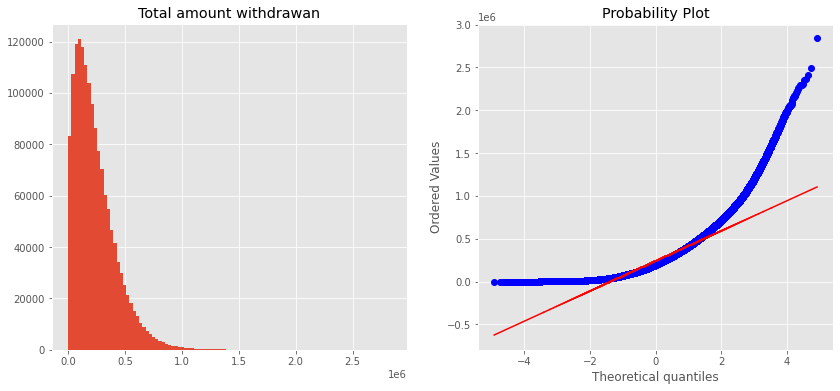

In [54]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
data['WITHDRAWAL'].hist(bins=100)
plt.title('Total amount withdrawan')
plt.subplot(1,2,2)
stats.probplot(data['WITHDRAWAL'], plot=plt);
data['WITHDRAWAL'].describe().T.round()

count       486.0
mean     282801.0
std      100337.0
min      182870.0
25%      182878.0
50%      272905.0
75%      333365.0
max      856080.0
Name: WITHDRAWAL, dtype: float64

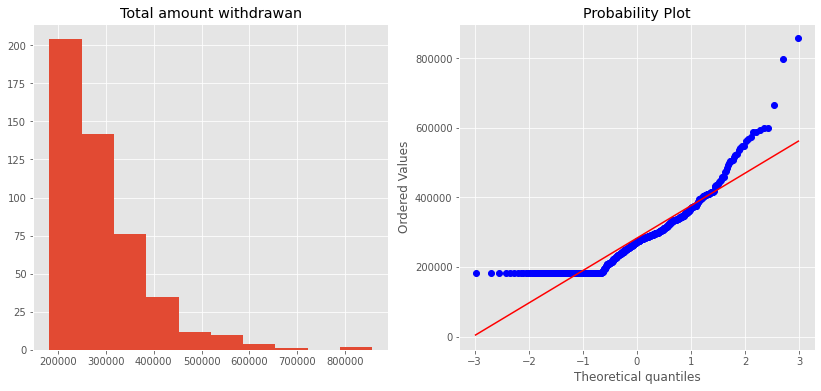

In [55]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
finfin['WITHDRAWAL'].hist(bins=10)
plt.title('Total amount withdrawan')
plt.subplot(1,2,2)
stats.probplot(finfin['WITHDRAWAL'], plot=plt);
finfin['WITHDRAWAL'].describe().T.round()

C:\Users\CBE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


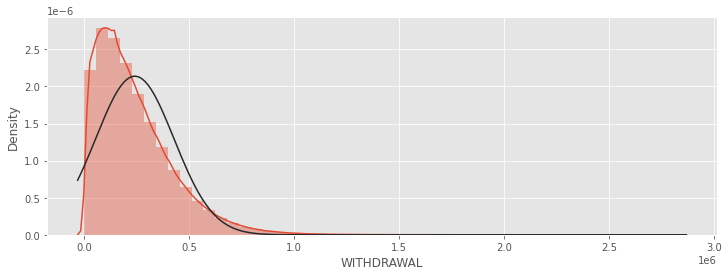

In [56]:
#from scipy import stats
fig, ax = plt.subplots(1)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.distplot(data['WITHDRAWAL'],fit=stats.norm)
plt.show()

C:\Users\CBE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


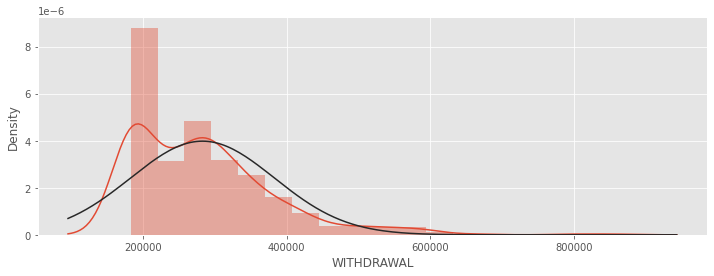

In [57]:
#from scipy import stats
fig, ax = plt.subplots(1)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.distplot(finfin['WITHDRAWAL'],fit=stats.norm)
plt.show()

In [58]:
data.head()

,DISTRICTNAME,BRANCHNAME,TERMINAL_ID,trxn_year,trxn_month,trxn_week,trxn_date,date,WITHDRAWAL,prv_week,HOLIDAY,hol_sequence,month_mean,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,holiday,hol_seq
TXN_DATE,,,,,,,,,,,,,,,,,,,,
2020-07-03,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,4,Friday,34820.0,38022.540144,W,WWW,33467.777778,37405.359332,38025.029240,0,16,83,1,7
2020-07-04,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,5,Saturday,36950.0,38022.540144,W,WWH,33467.777778,37405.359332,38025.029240,0,16,83,1,6
2020-07-05,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,6,Sunday,19830.0,38022.540144,H,WHW,33467.777778,37405.359332,38025.029240,0,16,83,0,5
2020-07-06,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,0,Monday,35640.0,30533.333333,W,HWW,33467.777778,37405.359332,38025.029240,0,16,83,1,3
2020-07-07,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,1,Tuesday,19830.0,30533.333333,W,WWW,33467.777778,37405.359332,30533.333333,0,16,83,1,7


In [59]:
data['prv_week']= data['prv_week'].astype(int)
data['prv_week']= data['prv_week'].astype(float)

In [60]:
data.dtypes

DISTRICTNAME        category
BRANCHNAME          category
TERMINAL_ID         category
trxn_year              int64
trxn_month             int64
trxn_week              int64
trxn_date              int64
date                  object
WITHDRAWAL           float64
prv_week             float64
HOLIDAY             category
hol_sequence        category
month_mean           float64
prv_month            float64
Pr_mnt_crrs_week     float64
District                int8
Branch                 int16
Terminal               int16
holiday                 int8
hol_seq                 int8
dtype: object

In [61]:
data.describe()

,trxn_year,trxn_month,trxn_week,trxn_date,WITHDRAWAL,prv_week,month_mean,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,holiday,hol_seq
count,1.516822e+06,1.516822e+06,1.516822e+06,1.516822e+06,1.516822e+06,1.516822e+06,1.516822e+06,1.516822e+06,1.516822e+06,1.516822e+06,1.516822e+06,1.516822e+06,1.516822e+06,1.516822e+06
mean,2.021265e+03,6.549765e+00,2.667886e+01,2.965999e+00,2.402949e+05,2.397600e+05,2.402949e+05,2.394864e+05,2.403288e+05,1.430129e+01,8.261547e+02,1.488394e+03,8.395705e-01,5.805705e+00
std,6.748800e-01,3.140668e+00,1.377684e+01,1.979442e+00,1.864867e+05,1.599099e+05,1.497812e+05,1.496683e+05,1.598273e+05,8.814598e+00,4.817736e+02,8.981126e+02,3.670040e-01,1.576217e+00
min,2.020000e+03,1.000000e+00,1.000000e+00,0.000000e+00,3.000000e+02,3.000000e+02,3.909091e+02,3.909091e+02,3.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.021000e+03,4.000000e+00,1.600000e+01,1.000000e+00,1.019750e+05,1.169820e+05,1.254717e+05,1.250073e+05,1.175857e+05,6.000000e+00,3.900000e+02,7.260000e+02,1.000000e+00,5.000000e+00
50%,2.021000e+03,7.000000e+00,2.700000e+01,3.000000e+00,1.976000e+05,2.109910e+05,2.175087e+05,2.160500e+05,2.116074e+05,1.300000e+01,8.200000e+02,1.438000e+03,1.000000e+00,7.000000e+00
75%,2.022000e+03,9.000000e+00,3.700000e+01,5.000000e+00,3.330000e+05,3.326850e+05,3.308806e+05,3.297093e+05,3.331214e+05,2.200000e+01,1.255000e+03,2.340000e+03,1.000000e+00,7.000000e+00
max,2.022000e+03,1.200000e+01,5.300000e+01,6.000000e+00,2.837050e+06,1.477992e+06,1.160337e+06,1.160337e+06,1.477993e+06,3.000000e+01,1.660000e+03,3.061000e+03,1.000000e+00,7.000000e+00


In [62]:
#data1=data[['trxn_year','WITHDRAWAL','active_days','week_total','week_mean','prv_week','trxn_month' , 'trxn_week' ,'trxn_date']]
#data1=data1.fillna(0.0)
#data1=data1.reset_index()
#data1.head()

In [63]:
#data1.to_csv('data2.csv')

In [64]:
#data1=pd.read_csv('data2.csv')

In [65]:
#data1

data1.shape

In [66]:
#data1.shape


In [67]:
#data1=data1.drop(columns=['date'])

In [68]:
data.corr(method ='pearson')

,trxn_year,trxn_month,trxn_week,trxn_date,WITHDRAWAL,prv_week,month_mean,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,holiday,hol_seq
trxn_year,1.000000,-0.540540,-0.538202,-0.000733,0.142980,0.167439,0.178018,0.180278,0.166893,-0.036499,0.013209,-0.020093,-0.011529,-0.018774
trxn_month,-0.540540,1.000000,0.963090,-0.006525,-0.047434,-0.059492,-0.059058,-0.064208,-0.058341,0.007432,-0.002614,0.004846,0.036996,0.056603
trxn_week,-0.538202,0.963090,1.000000,-0.005300,-0.056035,-0.062974,-0.062502,-0.065364,-0.065804,0.008077,-0.003090,0.005090,0.035771,0.053114
trxn_date,-0.000733,-0.006525,-0.005300,1.000000,-0.006393,0.004835,0.004526,0.004797,0.005651,-0.001047,-0.000405,-0.001205,-0.546853,0.168701
WITHDRAWAL,0.142980,-0.047434,-0.056035,-0.006393,1.000000,0.739879,0.803173,0.758603,0.791035,0.069855,0.030999,0.071478,0.081079,0.006251
prv_week,0.167439,-0.059492,-0.062974,0.004835,0.739879,1.000000,0.927029,0.895574,0.943393,0.081764,0.036135,0.083767,-0.010748,-0.003593
month_mean,0.178018,-0.059058,-0.062502,0.004526,0.803173,0.927029,1.000000,0.944507,0.931159,0.086974,0.038596,0.088995,-0.014499,-0.007555
prv_month,0.180278,-0.064208,-0.065364,0.004797,0.758603,0.895574,0.944507,1.000000,0.892041,0.087158,0.039434,0.089616,-0.013862,-0.008607
Pr_mnt_crrs_week,0.166893,-0.058341,-0.065804,0.005651,0.791035,0.943393,0.931159,0.892041,1.000000,0.081844,0.036134,0.083800,-0.017417,-0.015343
District,-0.036499,0.007432,0.008077,-0.001047,0.069855,0.081764,0.086974,0.087158,0.081844,1.000000,0.083671,0.974780,0.001429,-0.000421


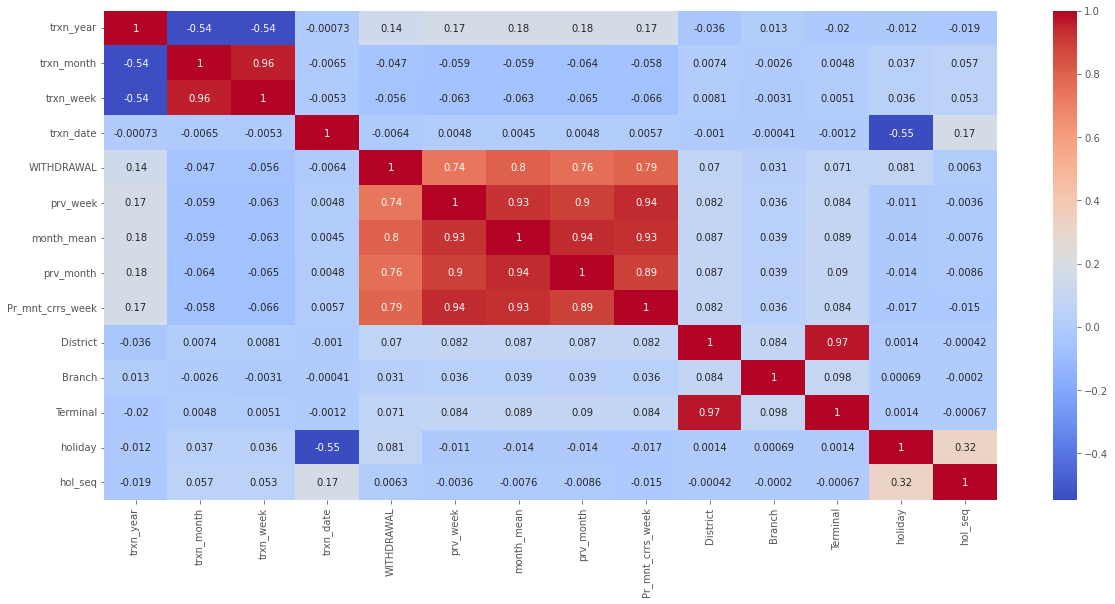

In [69]:
plt.figure(figsize=(20,9))

sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

plt.savefig('corr.jpg', format='jpg',bbox_inches='tight')
plt.show()


In [70]:
#data1['trxn_year']=data1['trxn_year'].astype(float)
#data1['active_days']=data1['active_days'].astype(float)

In [71]:
data.dtypes

DISTRICTNAME        category
BRANCHNAME          category
TERMINAL_ID         category
trxn_year              int64
trxn_month             int64
trxn_week              int64
trxn_date              int64
date                  object
WITHDRAWAL           float64
prv_week             float64
HOLIDAY             category
hol_sequence        category
month_mean           float64
prv_month            float64
Pr_mnt_crrs_week     float64
District                int8
Branch                 int16
Terminal               int16
holiday                 int8
hol_seq                 int8
dtype: object

In [72]:
data.head()

,DISTRICTNAME,BRANCHNAME,TERMINAL_ID,trxn_year,trxn_month,trxn_week,trxn_date,date,WITHDRAWAL,prv_week,HOLIDAY,hol_sequence,month_mean,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,holiday,hol_seq
TXN_DATE,,,,,,,,,,,,,,,,,,,,
2020-07-03,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,4,Friday,34820.0,38022.0,W,WWW,33467.777778,37405.359332,38025.029240,0,16,83,1,7
2020-07-04,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,5,Saturday,36950.0,38022.0,W,WWH,33467.777778,37405.359332,38025.029240,0,16,83,1,6
2020-07-05,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,6,Sunday,19830.0,38022.0,H,WHW,33467.777778,37405.359332,38025.029240,0,16,83,0,5
2020-07-06,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,0,Monday,35640.0,30533.0,W,HWW,33467.777778,37405.359332,38025.029240,0,16,83,1,3
2020-07-07,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,1,Tuesday,19830.0,30533.0,W,WWW,33467.777778,37405.359332,30533.333333,0,16,83,1,7


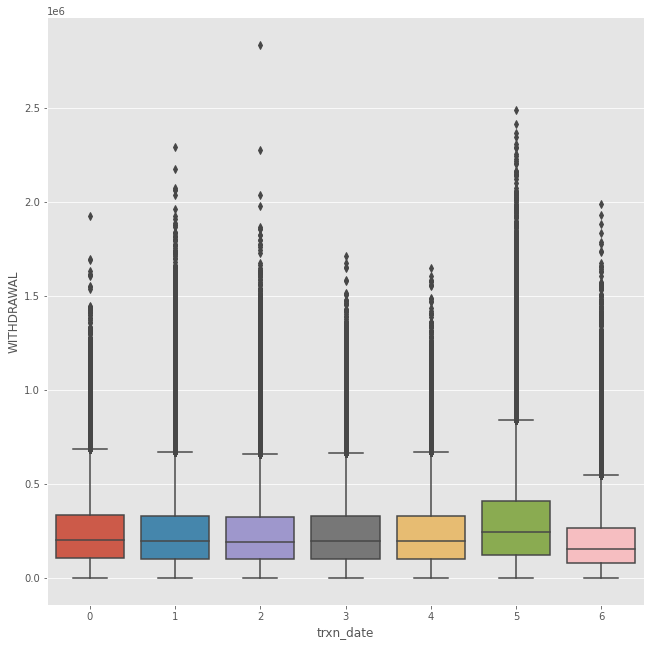

In [73]:
#cat = ['atm_name', 'weekday', 'festival_religion', 'working_day', 'holiday_sequence']

g = sns.catplot(x='trxn_date', y='WITHDRAWAL', kind="box", data=data);
g.fig.set_size_inches(10,10)

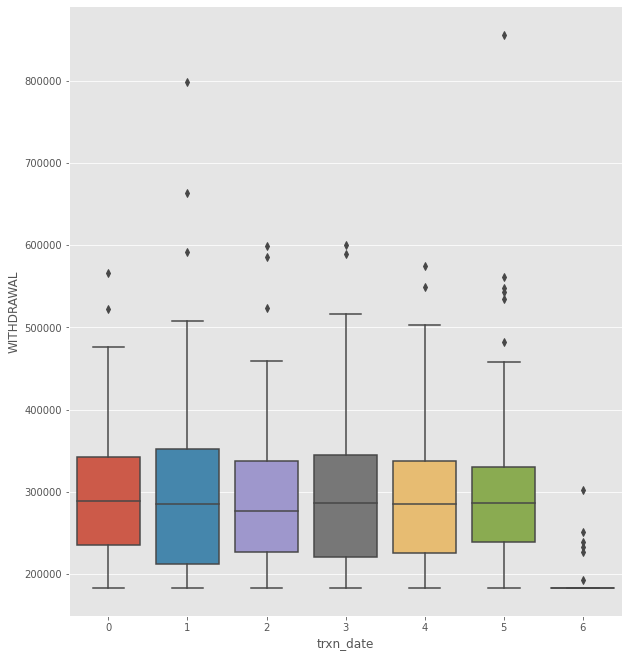

In [74]:
g = sns.catplot(x='trxn_date', y='WITHDRAWAL', kind="box", data=finfin);
g.fig.set_size_inches(10,10)

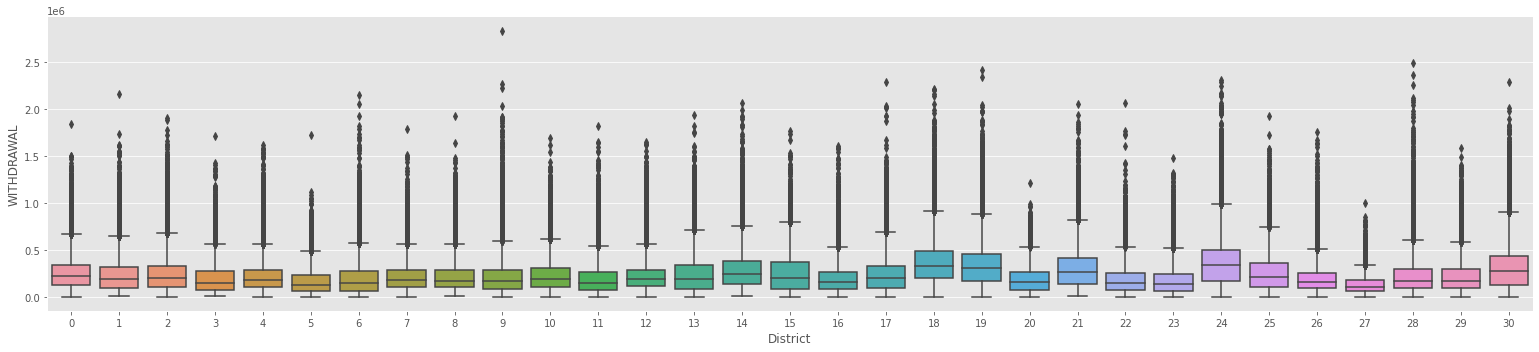

In [75]:
g = sns.catplot(x='District', y="WITHDRAWAL", kind="box", data=data);
g.fig.set_size_inches(25,5)

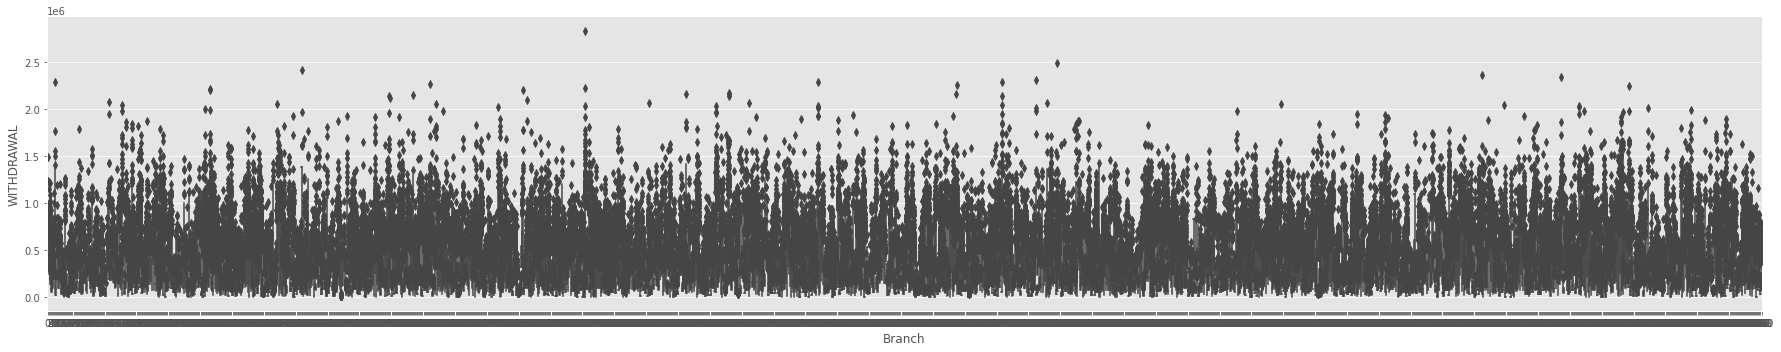

In [76]:
g = sns.catplot(x='Branch', y="WITHDRAWAL", kind="box", data=data);
g.fig.set_size_inches(30,5)

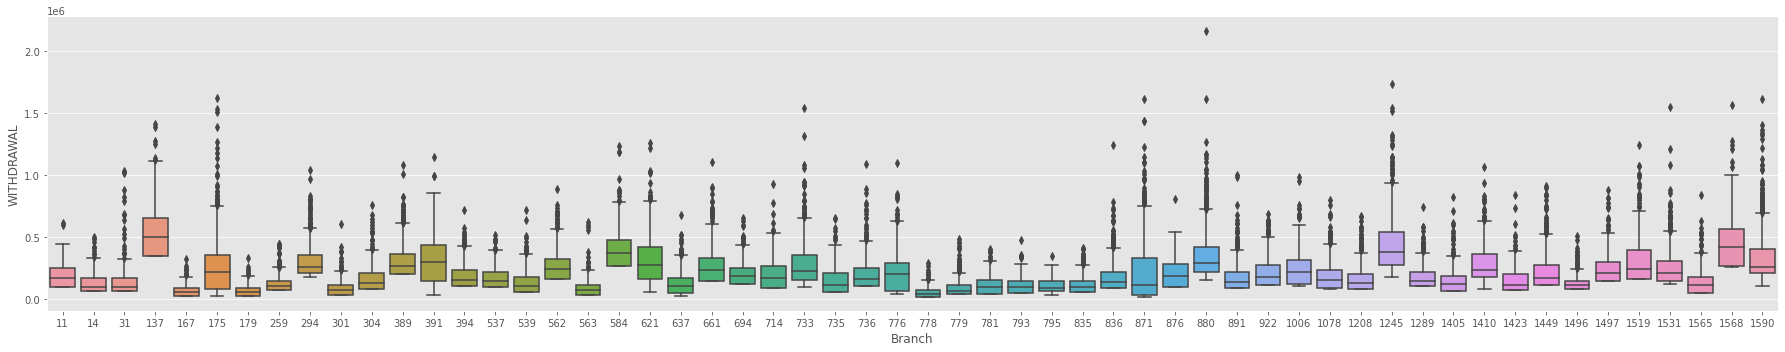

In [77]:
g = sns.catplot(x='Branch', y="WITHDRAWAL", kind="box", data=data[data['District']==1]);
g.fig.set_size_inches(30,5)

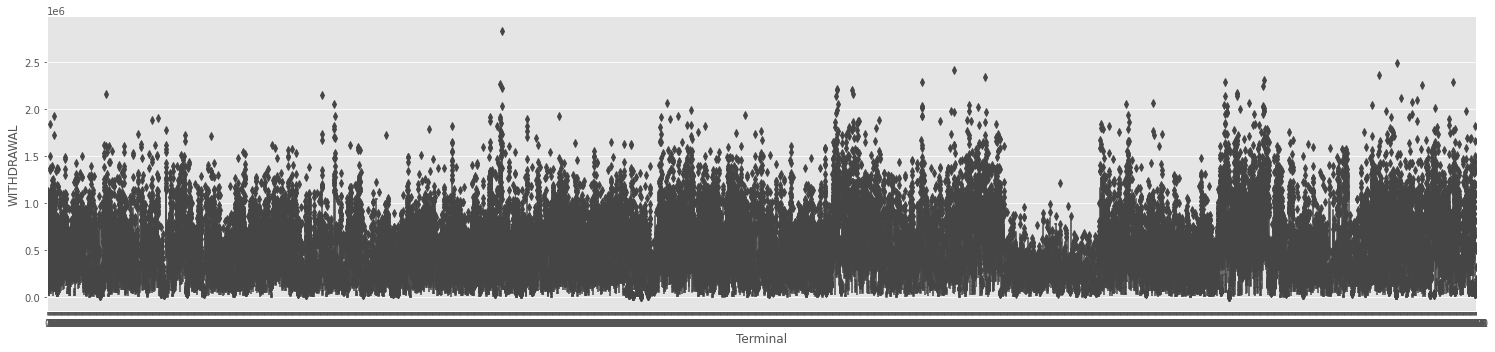

In [78]:
g = sns.catplot(x='Terminal', y="WITHDRAWAL", kind="box", data=data);
g.fig.set_size_inches(25,5)

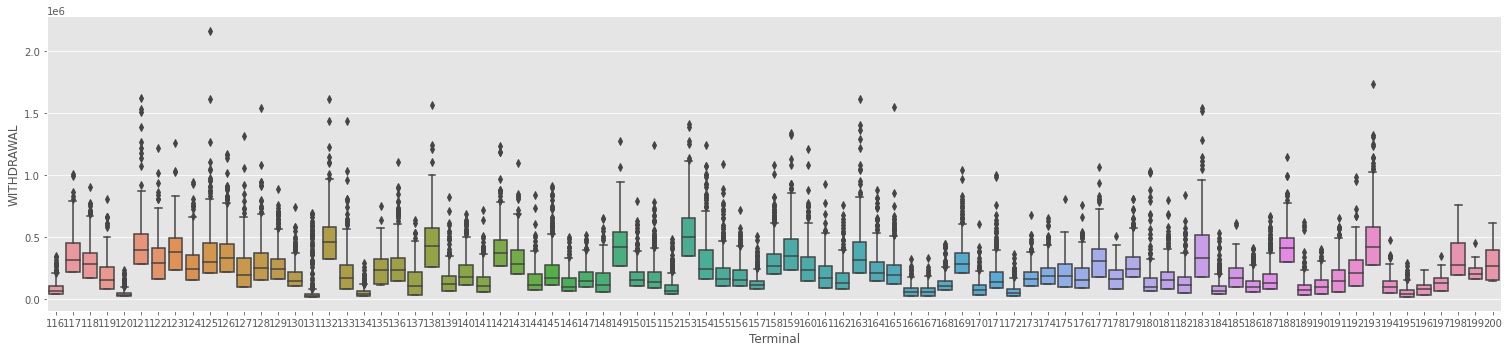

In [79]:
g = sns.catplot(x='Terminal', y="WITHDRAWAL", kind="box", data=data[data['District']==1]);
g.fig.set_size_inches(25,5)

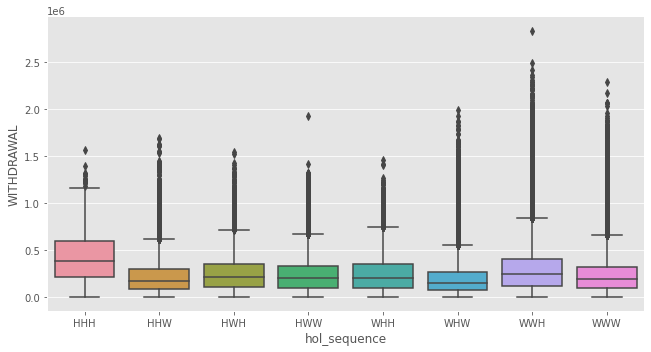

In [80]:
g = sns.catplot(x='hol_sequence', y="WITHDRAWAL", kind="box", data=data);
g.fig.set_size_inches(10,5)

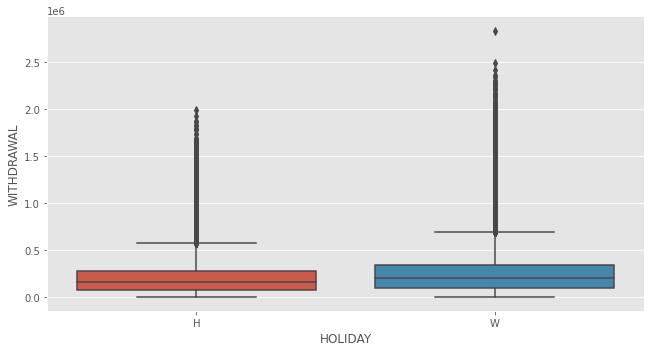

In [81]:
g = sns.catplot(x='HOLIDAY', y="WITHDRAWAL", kind="box", data=data);
g.fig.set_size_inches(10,5)

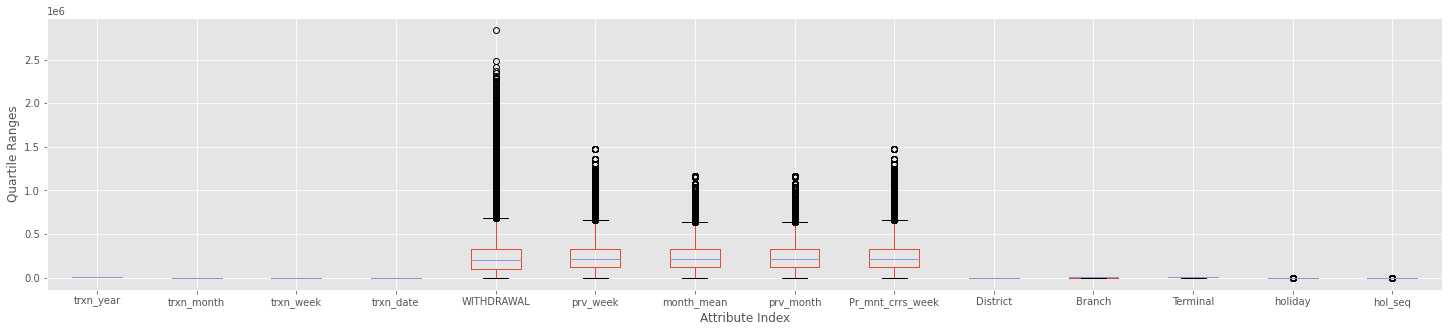

In [82]:
plt.figure(figsize=(25,5))
boxplot = data.boxplot()
plt.xlabel("Attribute Index")
plt.ylabel(("Quartile Ranges"))
plt.show()

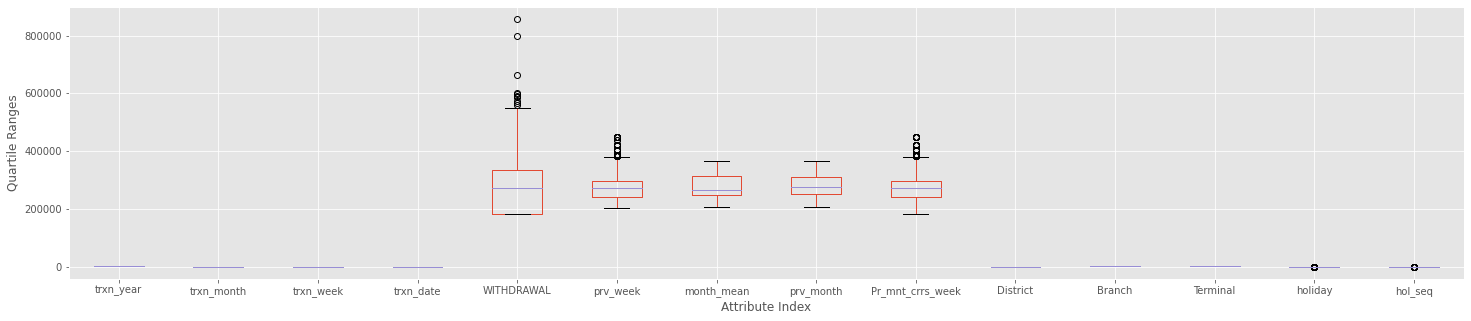

In [83]:
plt.figure(figsize=(25,5))
boxplot = finfin.boxplot()
plt.xlabel("Attribute Index")
plt.ylabel(("Quartile Ranges"))
plt.show()

In [84]:
data.tail(2)

,DISTRICTNAME,BRANCHNAME,TERMINAL_ID,trxn_year,trxn_month,trxn_week,trxn_date,date,WITHDRAWAL,prv_week,HOLIDAY,hol_sequence,month_mean,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,holiday,hol_seq
TXN_DATE,,,,,,,,,,,,,,,,,,,,
2022-08-30,YEKA,Yeka Terara,AYK00109,2022,8,35,1,Tuesday,460800.0,381828.0,W,WWW,306746.428571,256996.666667,381828.571429,30,1627,3054,1,7
2022-08-31,YEKA,Yeka Terara,AYK00109,2022,8,35,2,Wednesday,219100.0,381828.0,W,WWW,306746.428571,256996.666667,381828.571429,30,1627,3054,1,7


In [85]:
data.isnull().values.any()

False

In [86]:
data.dtypes

DISTRICTNAME        category
BRANCHNAME          category
TERMINAL_ID         category
trxn_year              int64
trxn_month             int64
trxn_week              int64
trxn_date              int64
date                  object
WITHDRAWAL           float64
prv_week             float64
HOLIDAY             category
hol_sequence        category
month_mean           float64
prv_month            float64
Pr_mnt_crrs_week     float64
District                int8
Branch                 int16
Terminal               int16
holiday                 int8
hol_seq                 int8
dtype: object

In [87]:
import sys
data['WITHDRAWAL'] = data['WITHDRAWAL'].astype(np.int64)
data['prv_week'] = data['prv_week'].astype(np.int64)
data['HOLIDAY'] = data['HOLIDAY'].astype(np.int64)
data['hol_sequence'] = data['hol_sequence'].astype(np.int64)
data['month_mean'] = data['month_mean'].astype(np.int64)
data['prv_month'] = data['prv_month'].astype(np.int64)
data['Pr_mnt_crrs_week'] = data['Pr_mnt_crrs_week'].astype(np.int64)
data['District'] = data['District'].astype(np.int64)
data['Branch'] = data['Branch'].astype(np.int64)
data['Terminal'] = data['Terminal'].astype(np.int64)

In [88]:
data

,DISTRICTNAME,BRANCHNAME,TERMINAL_ID,trxn_year,trxn_month,trxn_week,trxn_date,date,WITHDRAWAL,prv_week,HOLIDAY,hol_sequence,month_mean,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,holiday,hol_seq
TXN_DATE,,,,,,,,,,,,,,,,,,,,
2020-07-03,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,4,Friday,34820,38022,W,WWW,33467,37405,38025,0,16,83,1,7
2020-07-04,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,5,Saturday,36950,38022,W,WWH,33467,37405,38025,0,16,83,1,6
2020-07-05,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,6,Sunday,19830,38022,H,WHW,33467,37405,38025,0,16,83,0,5
2020-07-06,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,0,Monday,35640,30533,W,HWW,33467,37405,38025,0,16,83,1,3
2020-07-07,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,1,Tuesday,19830,30533,W,WWW,33467,37405,30533,0,16,83,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,YEKA,Yeka Terara,AYK00109,2022,8,34,5,Saturday,349600,252128,W,WWH,306746,256996,381828,30,1627,3054,1,6
2022-08-28,YEKA,Yeka Terara,AYK00109,2022,8,34,6,Sunday,680500,252128,H,WHW,306746,256996,381828,30,1627,3054,0,5
2022-08-29,YEKA,Yeka Terara,AYK00109,2022,8,35,0,Monday,494500,381828,W,HWW,306746,256996,381828,30,1627,3054,1,3


In [90]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data[['WITHDRAWAL', 'prv_week','prv_month','Pr_mnt_crrs_week','District','Branch','Terminal',
                       'trxn_month','trxn_week','trxn_date','HOLIDAY','hol_sequence']]

# Select the categorical columns
# dropped atm_name
#categorical_subset = data[['DISTRICTNAME','BRANCHNAME','TERMINAL_ID','HOLIDAY','hol_sequence']]

# One hot encode
#categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
#features = pd.concat([numeric_subset, categorical_subset], axis = 1)
features=numeric_subset

In [91]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516822 entries, 2020-07-03 to 2022-08-31
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype
---  ------            --------------    -----
 0   WITHDRAWAL        1516822 non-null  int64
 1   prv_week          1516822 non-null  int64
 2   prv_month         1516822 non-null  int64
 3   Pr_mnt_crrs_week  1516822 non-null  int64
 4   District          1516822 non-null  int64
 5   Branch            1516822 non-null  int64
 6   Terminal          1516822 non-null  int64
 7   trxn_month        1516822 non-null  int64
 8   trxn_week         1516822 non-null  int64
 9   trxn_date         1516822 non-null  int64
 10  holiday           1516822 non-null  int64
 11  hol_seq           1516822 non-null  int64
dtypes: int64(12)
memory usage: 190.4+ MB


In [92]:
features

,WITHDRAWAL,prv_week,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,trxn_month,trxn_week,trxn_date,holiday,hol_seq
TXN_DATE,,,,,,,,,,,,
2020-07-03,34820,38022,37405,38025,0,16,83,7,27,4,1,7
2020-07-04,36950,38022,37405,38025,0,16,83,7,27,5,1,6
2020-07-05,19830,38022,37405,38025,0,16,83,7,27,6,0,5
2020-07-06,35640,30533,37405,38025,0,16,83,7,28,0,1,3
2020-07-07,19830,30533,37405,30533,0,16,83,7,28,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,349600,252128,256996,381828,30,1627,3054,8,34,5,1,6
2022-08-28,680500,252128,256996,381828,30,1627,3054,8,34,6,0,5
2022-08-29,494500,381828,256996,381828,30,1627,3054,8,35,0,1,3


In [97]:
data

,DISTRICTNAME,BRANCHNAME,TERMINAL_ID,trxn_year,trxn_month,trxn_week,trxn_date,date,WITHDRAWAL,prv_week,HOLIDAY,hol_sequence,month_mean,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,holiday,hol_seq
TXN_DATE,,,,,,,,,,,,,,,,,,,,
2020-07-03,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,4,Friday,34820,38022,W,WWW,33467,37405,38025,0,16,83,1,7
2020-07-04,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,5,Saturday,36950,38022,W,WWH,33467,37405,38025,0,16,83,1,6
2020-07-05,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,6,Sunday,19830,38022,H,WHW,33467,37405,38025,0,16,83,0,5
2020-07-06,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,0,Monday,35640,30533,W,HWW,33467,37405,38025,0,16,83,1,3
2020-07-07,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,1,Tuesday,19830,30533,W,WWW,33467,37405,30533,0,16,83,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,YEKA,Yeka Terara,AYK00109,2022,8,34,5,Saturday,349600,252128,W,WWH,306746,256996,381828,30,1627,3054,1,6
2022-08-28,YEKA,Yeka Terara,AYK00109,2022,8,34,6,Sunday,680500,252128,H,WHW,306746,256996,381828,30,1627,3054,0,5
2022-08-29,YEKA,Yeka Terara,AYK00109,2022,8,35,0,Monday,494500,381828,W,HWW,306746,256996,381828,30,1627,3054,1,3


In [87]:
X = features.copy().drop(columns = ['WITHDRAWAL'])
y = features['WITHDRAWAL'].copy()

In [88]:
X

,prv_week,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,trxn_month,trxn_week,trxn_date,HOLIDAY,hol_sequence
TXN_DATE,,,,,,,,,,,
2020-07-03,38022,37405,38025,0,16,83,7,27,4,1,7
2020-07-04,38022,37405,38025,0,16,83,7,27,5,1,6
2020-07-05,38022,37405,38025,0,16,83,7,27,6,0,5
2020-07-06,30533,37405,38025,0,16,83,7,28,0,1,3
2020-07-07,30533,37405,30533,0,16,83,7,28,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,252128,256996,381828,30,1627,3054,8,34,5,1,6
2022-08-28,252128,256996,381828,30,1627,3054,8,34,6,0,5
2022-08-29,381828,256996,381828,30,1627,3054,8,35,0,1,3


In [89]:
features

,WITHDRAWAL,prv_week,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,trxn_month,trxn_week,trxn_date,HOLIDAY,hol_sequence
TXN_DATE,,,,,,,,,,,,
2020-07-03,34820,38022,37405,38025,0,16,83,7,27,4,1,7
2020-07-04,36950,38022,37405,38025,0,16,83,7,27,5,1,6
2020-07-05,19830,38022,37405,38025,0,16,83,7,27,6,0,5
2020-07-06,35640,30533,37405,38025,0,16,83,7,28,0,1,3
2020-07-07,19830,30533,37405,30533,0,16,83,7,28,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,349600,252128,256996,381828,30,1627,3054,8,34,5,1,6
2022-08-28,680500,252128,256996,381828,30,1627,3054,8,34,6,0,5
2022-08-29,494500,381828,256996,381828,30,1627,3054,8,35,0,1,3


In [90]:
features.shape

(1516822, 12)

In [91]:
y

TXN_DATE
2020-07-03     34820
2020-07-04     36950
2020-07-05     19830
2020-07-06     35640
2020-07-07     19830
               ...  
2022-08-27    349600
2022-08-28    680500
2022-08-29    494500
2022-08-30    460800
2022-08-31    219100
Name: WITHDRAWAL, Length: 1516822, dtype: int64

In [92]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, shuffle= False, test_size = 0.2, random_state = 42)
print('length of Xtrain and Xtest: ', len(Xtrain), len(Xtest))
print('length of ytrain and ytest: ', len(ytrain), len(ytest))

<IPython.core.display.Javascript object>

length of Xtrain and Xtest:  1213457 303365
length of ytrain and ytest:  1213457 303365


In [93]:
from sklearn.metrics import r2_score

In [94]:
data.index = pd.to_datetime(data.index)

# NGBOOST

In [95]:
SEED = 2022
# Fit and predict
np.random.seed(SEED)
ngb = NGBRegressor(n_estimators=400,
                   Base=default_tree_learner, Dist=Normal, Score=MLE).fit(Xtrain, ytrain)
ypred = ngb.predict(Xtest)
print('NGBoost: R2 score on testing data: {:.2f}%'.format(100 * r2_score(ytest, ypred)))

[iter 0] loss=13.5204 val_loss=0.0000 scale=1.0000 norm=138043.9705
[iter 100] loss=12.9761 val_loss=0.0000 scale=2.0000 norm=153605.2105
[iter 200] loss=12.8021 val_loss=0.0000 scale=2.0000 norm=138179.6717
[iter 300] loss=12.7556 val_loss=0.0000 scale=2.0000 norm=135751.7512
NGBoost: R2 score on testing data: 67.43%


In [96]:
ypred

array([276608.53488197, 262793.11412693, 284610.22312187, ...,
       322095.22188942, 315266.6395088 , 314091.05290492])

In [98]:
ngbpred = pd.DataFrame(ypred[-50:]) # predicting last 10 values
ngbpred.rename(columns = {0: 'ngb_predicted'}, inplace=True) # renaming the column
ngbpred = ngbpred.round(decimals=0) # rounding the decimal values
d = pd.DataFrame(data[['WITHDRAWAL','TERMINAL_ID', 'DISTRICTNAME','BRANCHNAME']]).tail(50) # calling last 50 values of original amt wothdrawn
ngbpred.index = d.index # mapping the index of both dataframe
ngbok = pd.concat([ngbpred, d], axis=1) 
ngbok['accuracy'] = round(ngbok.apply(lambda row: row.ngb_predicted / 
                                            row.WITHDRAWAL *100, axis = 1),2)
ngbok['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in ngbok['accuracy']], 
                                     index = ngbok.index)
ngbok = ngbok.assign(day_of_week = lambda x: x.index.day_name())
ngbok

,ngb_predicted,WITHDRAWAL,TERMINAL_ID,DISTRICTNAME,BRANCHNAME,accuracy,day_of_week
TXN_DATE,,,,,,,
2022-07-09,316579.0,98900,AYK00109,YEKA,Yeka Terara,320.10%,Saturday
2022-07-10,247341.0,318900,AYK00109,YEKA,Yeka Terara,77.56%,Sunday
2022-07-11,305890.0,291500,AYK00109,YEKA,Yeka Terara,104.94%,Monday
2022-07-12,298174.0,279300,AYK00109,YEKA,Yeka Terara,106.76%,Tuesday
2022-07-13,296998.0,365700,AYK00109,YEKA,Yeka Terara,81.21%,Wednesday
2022-07-14,296998.0,98900,AYK00109,YEKA,Yeka Terara,300.30%,Thursday
2022-07-15,251946.0,129300,AYK00109,YEKA,Yeka Terara,194.85%,Friday
2022-07-16,303791.0,356500,AYK00109,YEKA,Yeka Terara,85.21%,Saturday
2022-07-17,207370.0,98900,AYK00109,YEKA,Yeka Terara,209.68%,Sunday


In [99]:
Y_dists = ngb.pred_dist(Xtest)

# test Mean Squared Error
test_MSE = mean_squared_error(ypred, ytest)
print('Test MSE', test_MSE)

# test Negative Log Likelihood
test_NLL = -Y_dists.logpdf(ytest).mean()
print('Test NLL', test_NLL)


Test MSE 14167442091.851458
Test NLL 12.89790584810536


In [100]:
mean_ngb_test = ytest.mean()
mean_ngb_pred = ypred.mean()
print(mean_ngb_test, mean_ngb_pred)

accuracy = (mean_ngb_pred / mean_ngb_test)*100
print('accuracy:', round(accuracy,2))

262126.62942330196 260247.39135050026
accuracy: 99.28


In [101]:
#from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)

In [102]:
Xtrain

,prv_week,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,trxn_month,trxn_week,trxn_date,HOLIDAY,hol_sequence
TXN_DATE,,,,,,,,,,,
2020-07-03,38022,37405,38025,0,16,83,7,27,4,1,7
2020-07-04,38022,37405,38025,0,16,83,7,27,5,1,6
2020-07-05,38022,37405,38025,0,16,83,7,27,6,0,5
2020-07-06,30533,37405,38025,0,16,83,7,28,0,1,3
2020-07-07,30533,37405,30533,0,16,83,7,28,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-22,293851,232568,243853,24,29,2558,5,20,5,1,6
2021-05-23,293851,232568,243853,24,29,2558,5,20,6,0,5
2021-05-24,243853,232568,243853,24,29,2558,5,21,0,1,3


In [ ]:
#ty=ytrain.reset_index()

In [103]:
ytrain.head()

TXN_DATE
2020-07-03    34820
2020-07-04    36950
2020-07-05    19830
2020-07-06    35640
2020-07-07    19830
Name: WITHDRAWAL, dtype: int64

In [104]:
features

,WITHDRAWAL,prv_week,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,trxn_month,trxn_week,trxn_date,HOLIDAY,hol_sequence
TXN_DATE,,,,,,,,,,,,
2020-07-03,34820,38022,37405,38025,0,16,83,7,27,4,1,7
2020-07-04,36950,38022,37405,38025,0,16,83,7,27,5,1,6
2020-07-05,19830,38022,37405,38025,0,16,83,7,27,6,0,5
2020-07-06,35640,30533,37405,38025,0,16,83,7,28,0,1,3
2020-07-07,19830,30533,37405,30533,0,16,83,7,28,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,349600,252128,256996,381828,30,1627,3054,8,34,5,1,6
2022-08-28,680500,252128,256996,381828,30,1627,3054,8,34,6,0,5
2022-08-29,494500,381828,256996,381828,30,1627,3054,8,35,0,1,3


In [105]:
X

,prv_week,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,trxn_month,trxn_week,trxn_date,HOLIDAY,hol_sequence
TXN_DATE,,,,,,,,,,,
2020-07-03,38022,37405,38025,0,16,83,7,27,4,1,7
2020-07-04,38022,37405,38025,0,16,83,7,27,5,1,6
2020-07-05,38022,37405,38025,0,16,83,7,27,6,0,5
2020-07-06,30533,37405,38025,0,16,83,7,28,0,1,3
2020-07-07,30533,37405,30533,0,16,83,7,28,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,252128,256996,381828,30,1627,3054,8,34,5,1,6
2022-08-28,252128,256996,381828,30,1627,3054,8,34,6,0,5
2022-08-29,381828,256996,381828,30,1627,3054,8,35,0,1,3


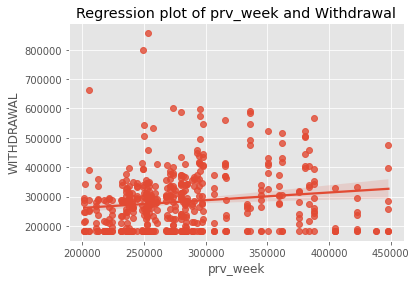

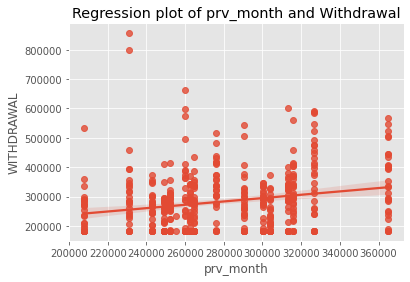

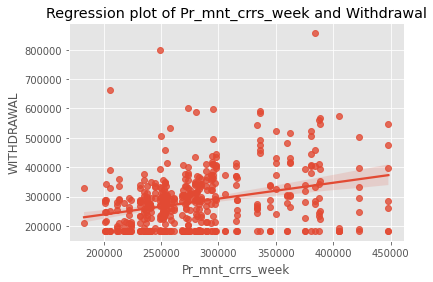

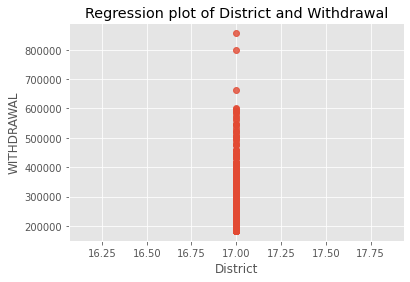

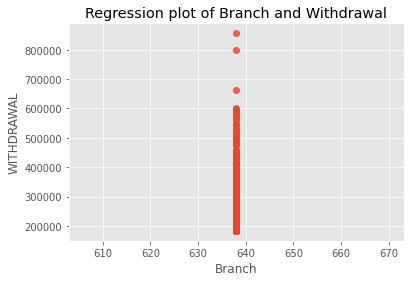

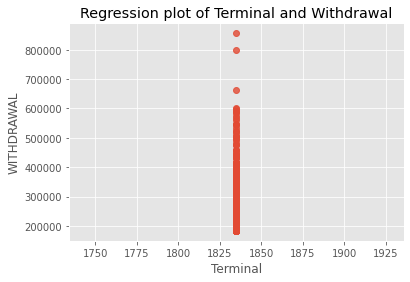

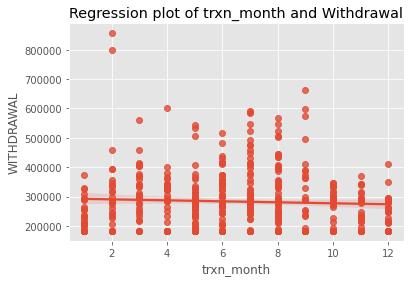

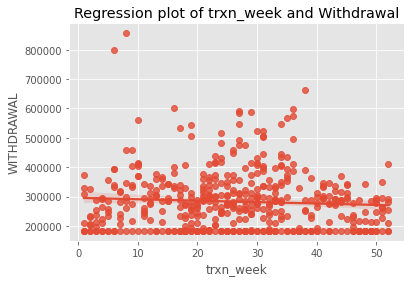

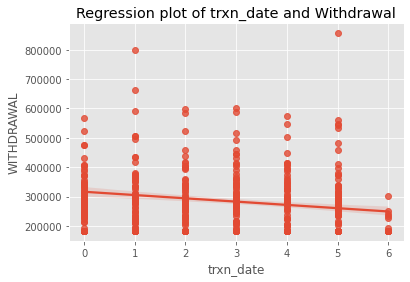

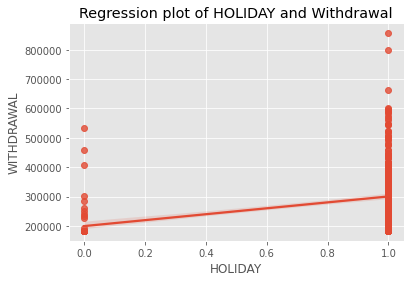

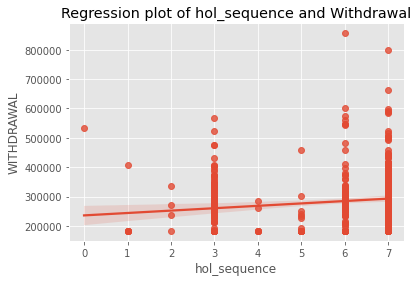

In [106]:
variables = ['prv_week','prv_month','Pr_mnt_crrs_week','District','Branch','Terminal','trxn_month','trxn_week','trxn_date','HOLIDAY','hol_sequence']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='WITHDRAWAL', data=features).set(title=f'Regression plot of {var} and Withdrawal');

## Linear Regression

In [107]:
linear = LinearRegression()
linear.fit(Xtrain, ytrain)

#Xtest_scaled = scaler.transform(Xtest)
# make predictions
lin_pred = linear.predict(Xtest)

In [108]:
from datetime import date

In [109]:
data.columns

Index(['DISTRICTNAME', 'BRANCHNAME', 'TERMINAL_ID', 'trxn_year', 'trxn_month', 'trxn_week', 'trxn_date', 'date', 'WITHDRAWAL', 'prv_week', 'HOLIDAY',
       'hol_sequence', 'month_mean', 'prv_month', 'Pr_mnt_crrs_week', 'District', 'Branch', 'Terminal'],
      dtype='object')

In [110]:
linpred = pd.DataFrame(lin_pred[-50:]) # predicting last 50 values
linpred.rename(columns = {0: 'lin_predicted'}, inplace=True) # renaming the column
linpred = linpred.round(decimals=0) # rounding the decimal values
d = pd.DataFrame(data[['WITHDRAWAL','TERMINAL_ID', 'DISTRICTNAME','BRANCHNAME']]).tail(50) # calling last 50 values of original amt wothdrawn
linpred.index = d.index # mapping the index of both dataframe
linok = pd.concat([linpred, d], axis=1) 
linok['accuracy'] = round(linok.apply(lambda row: row.lin_predicted / 
                                            row.WITHDRAWAL *100, axis = 1),2)
linok['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in linok['accuracy']], 
                                     index = linok.index)
linok = linok.assign(day_of_week = lambda x: x.index.day_name())
linok

,lin_predicted,WITHDRAWAL,TERMINAL_ID,DISTRICTNAME,BRANCHNAME,accuracy,day_of_week
TXN_DATE,,,,,,,
2022-07-09,244418.0,98900,AYK00109,YEKA,Yeka Terara,247.14%,Saturday
2022-07-10,267603.0,318900,AYK00109,YEKA,Yeka Terara,83.91%,Sunday
2022-07-11,305308.0,291500,AYK00109,YEKA,Yeka Terara,104.74%,Monday
2022-07-12,291893.0,279300,AYK00109,YEKA,Yeka Terara,104.51%,Tuesday
2022-07-13,299392.0,365700,AYK00109,YEKA,Yeka Terara,81.87%,Wednesday
2022-07-14,306891.0,98900,AYK00109,YEKA,Yeka Terara,310.30%,Thursday
2022-07-15,255883.0,129300,AYK00109,YEKA,Yeka Terara,197.90%,Friday
2022-07-16,268611.0,356500,AYK00109,YEKA,Yeka Terara,75.35%,Saturday
2022-07-17,203994.0,98900,AYK00109,YEKA,Yeka Terara,206.26%,Sunday


In [111]:
mean_lin_test = ytest.mean()
mean_lin_pred = lin_pred.mean()
print(mean_lin_test, mean_lin_pred)

accuracy = (mean_lin_pred / mean_lin_test)*100
print('Accuracy: %', format(round(accuracy,2)))


262126.62942330196 262514.66807202954
Accuracy: % 100.15


In [ ]:
#print( linpred(X, linear.coef_.T,
                      # dense_output=True) + linear.intercept_)

In [110]:
print(linear.intercept_)

-51287.461856161826


In [111]:
print(linear.coef_)

[-2.47612148e-01  3.86695411e-01  8.36660991e-01  3.66634350e+02
  1.55362955e-01 -3.23675075e+00  2.16804844e+03 -5.33440697e+02
  7.49916185e+03  7.73443998e+04 -5.22854975e+03]


## XGBoost

In [118]:
xgb = XGBRegressor(objective = 'reg:squarederror')
xgb.fit(Xtrain, ytrain)
# make predictions
xgb_pred = xgb.predict(Xtest)

In [113]:
d

,WITHDRAWAL,TERMINAL_ID,DISTRICTNAME,BRANCHNAME
TXN_DATE,,,,
2022-07-09,98900,AYK00109,YEKA,Yeka Terara
2022-07-10,318900,AYK00109,YEKA,Yeka Terara
2022-07-11,291500,AYK00109,YEKA,Yeka Terara
2022-07-12,279300,AYK00109,YEKA,Yeka Terara
2022-07-13,365700,AYK00109,YEKA,Yeka Terara
2022-07-14,98900,AYK00109,YEKA,Yeka Terara
2022-07-15,129300,AYK00109,YEKA,Yeka Terara
2022-07-16,356500,AYK00109,YEKA,Yeka Terara
2022-07-17,98900,AYK00109,YEKA,Yeka Terara


In [120]:
xgb = XGBRegressor(objective = 'reg:squarederror')
xgb.fit(Xtrain, ytrain)
# make predictions
xgb_pred = xgb.predict(Xtest)

xgbpred = pd.DataFrame(xgb_pred[-50:])
xgbpred.rename(columns = {0: 'xgb_predicted'}, inplace=True)
xgbpred = xgbpred.round(decimals=0)
xgbpred.index = d.index
xgbok = pd.concat([xgbpred, d], axis=1)
xgbok['accuracy'] = round(xgbok.apply(lambda row: row.xgb_predicted / 
                                            row.WITHDRAWAL *100, axis = 1),2)
xgbok['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in xgbok['accuracy']], 
                                     index = xgbok.index)
xgbok = xgbok.assign(day_of_week = lambda x: x.index.day_name())
xgbok

,xgb_predicted,WITHDRAWAL,TERMINAL_ID,DISTRICTNAME,BRANCHNAME,accuracy,day_of_week
TXN_DATE,,,,,,,
2022-07-09,305441.0,98900,AYK00109,YEKA,Yeka Terara,308.84%,Saturday
2022-07-10,202654.0,318900,AYK00109,YEKA,Yeka Terara,63.55%,Sunday
2022-07-11,308788.0,291500,AYK00109,YEKA,Yeka Terara,105.93%,Monday
2022-07-12,277965.0,279300,AYK00109,YEKA,Yeka Terara,99.52%,Tuesday
2022-07-13,275334.0,365700,AYK00109,YEKA,Yeka Terara,75.29%,Wednesday
2022-07-14,281690.0,98900,AYK00109,YEKA,Yeka Terara,284.82%,Thursday
2022-07-15,223107.0,129300,AYK00109,YEKA,Yeka Terara,172.55%,Friday
2022-07-16,272651.0,356500,AYK00109,YEKA,Yeka Terara,76.48%,Saturday
2022-07-17,166978.0,98900,AYK00109,YEKA,Yeka Terara,168.84%,Sunday


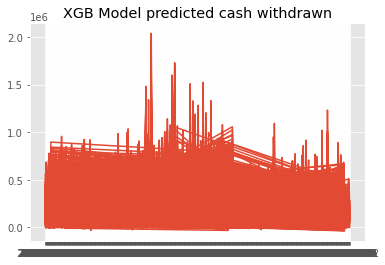

In [121]:
xgbPred = pd.DataFrame(xgb_pred)
xgbPred.index = ytest.index
plt.plot(xgbPred, label = 'Actual withdrawal')
plt.title('XGB Model predicted cash withdrawn')
plt.show()

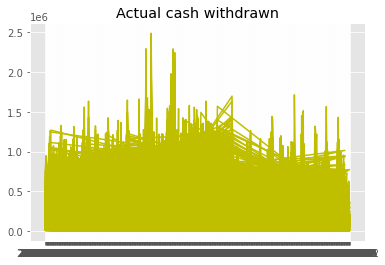

In [122]:
plt.plot(ytest, label = 'Actual withdrawal', color='y')
plt.title('Actual cash withdrawn')
plt.show()

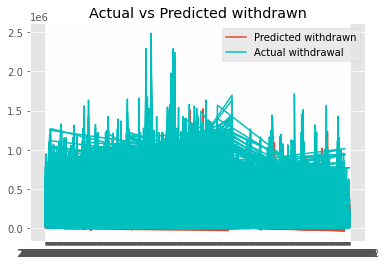

In [123]:
xgbPred = pd.DataFrame(xgb_pred)
xgbPred.index = ytest.index
plt.plot(xgbPred, label = 'Predicted withdrawn')
plt.plot(ytest, color='c', label = 'Actual withdrawal')
plt.legend(loc='best')
plt.title('Actual vs Predicted withdrawn')
plt.show()

In [124]:
mean_xgb_test = ytest.mean()
mean_xgb_pred = xgb_pred.mean()
print(mean_xgb_test, mean_xgb_pred)

accuracy = (mean_xgb_pred  / mean_xgb_test)*100
print('accuracy:', round(accuracy,2))


262126.62942330196 239776.27
accuracy: 91.47


In [ ]:
#pip install shap

In [125]:
import shap
shap_values = shap.TreeExplainer(xgb).shap_values(Xtest)
shap.summary_plot(shap_values, Xtest, plot_type="bar")

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 1401414.000000, while the model output was 1401412.875000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [ ]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()
# j will be the record we explain
j = 1

explainerXGB = shap.TreeExplainer(xgb)
shap_values_XGB_test = explainerXGB.shap_values(subsample_Xtest)
shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[j], subsample_Xtest.iloc[[j]])

In [126]:
subsample_Xtest = Xtest.sample(n = 10000)
subsample_Xtest.shape

(10000, 11)

In [127]:
# visualize the training set predictions
# load JS visualization code to notebook
shap.initjs()
shap.force_plot(explainerXGB.expected_value, shap_values, subsample_Xtest)

NameError: name 'explainerXGB' is not defined

# ANN new

In [188]:
# Quick sanity check with the shapes of Training and testing datasets
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(1213457, 11)
(1213457,)
(303365, 11)
(303365,)


In [140]:
Data = features.values # converting numpy array
tr_data = math.ceil(len(Data)*0.8)
te_data = len(features) - tr_data # remaining is test data
print(tr_data, te_data)

# split the actual dataframe in train/test set
train, test = features.iloc[0:tr_data], features.iloc[tr_data : len(features)]
print(train.shape, test.shape)

1213458 303364
(1213458, 12) (303364, 12)


In [142]:
# Feature Scaling Normalization
scaler = MinMaxScaler()
training_data = scaler.fit_transform(train)
print(training_data)
print('\n')
print(training_data.shape)

[[0.01209921 0.02539574 0.03181915 ... 0.66666667 1.         1.        ]
 [0.01285012 0.02539574 0.03181915 ... 0.83333333 1.         0.85714286]
 [0.00681462 0.02539574 0.03181915 ... 1.         0.         0.71428571]
 ...
 [0.10572703 0.16470681 0.20008691 ... 0.16666667 1.         1.        ]
 [0.0733814  0.16470681 0.20008691 ... 0.33333333 1.         1.        ]
 [0.07310359 0.16470681 0.20008691 ... 0.5        1.         0.85714286]]


(1213458, 12)


In [189]:
Xtrain

,prv_week,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,trxn_month,trxn_week,trxn_date,HOLIDAY,hol_sequence
TXN_DATE,,,,,,,,,,,
2020-07-03,38022,37405,38025,0,16,83,7,27,4,1,7
2020-07-04,38022,37405,38025,0,16,83,7,27,5,1,6
2020-07-05,38022,37405,38025,0,16,83,7,27,6,0,5
2020-07-06,30533,37405,38025,0,16,83,7,28,0,1,3
2020-07-07,30533,37405,30533,0,16,83,7,28,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-22,293851,232568,243853,24,29,2558,5,20,5,1,6
2021-05-23,293851,232568,243853,24,29,2558,5,20,6,0,5
2021-05-24,243853,232568,243853,24,29,2558,5,21,0,1,3


In [163]:
  """
  Standard Scale test and train data
  Z - Score normalization
  """

standard_scaler = StandardScaler()
X_train = pd.DataFrame(standard_scaler.fit_transform(Xtrain), columns=Xtrain.columns)

X_test = pd.DataFrame(standard_scaler.transform(Xtest), columns = Xtest.columns)

print( X_train, X_test)


<IPython.core.display.Javascript object>

         prv_week  prv_month  Pr_mnt_crrs_week  District    Branch  Terminal  trxn_month  trxn_week  trxn_date   HOLIDAY  hol_sequence
0       -1.272358  -1.361160         -1.276699 -1.636747 -1.668387 -1.564295    0.144912   0.025266   0.522284  0.437155      0.757301
1       -1.272358  -1.361160         -1.276699 -1.636747 -1.668387 -1.564295    0.144912   0.025266   1.027470  0.437155      0.122691
2       -1.272358  -1.361160         -1.276699 -1.636747 -1.668387 -1.564295    0.144912   0.025266   1.532655 -2.287517     -0.511919
3       -1.320912  -1.361160         -1.276699 -1.636747 -1.668387 -1.564295    0.144912   0.097834  -1.498459  0.437155     -1.781139
4       -1.320912  -1.361160         -1.325296 -1.636747 -1.668387 -1.564295    0.144912   0.097834  -0.993273  0.437155      0.757301
...           ...        ...               ...       ...       ...       ...         ...        ...        ...       ...           ...
1213452  0.386282  -0.009613          0.058414  1.88660

In [190]:
ytrain.shape

(1213457,)

In [159]:
training_data

array([[0.01209921, 0.02539574, 0.03181915, ..., 0.66666667, 1.        ,
        1.        ],
       [0.01285012, 0.02539574, 0.03181915, ..., 0.83333333, 1.        ,
        0.85714286],
       [0.00681462, 0.02539574, 0.03181915, ..., 1.        , 0.        ,
        0.71428571],
       ...,
       [0.10572703, 0.16470681, 0.20008691, ..., 0.16666667, 1.        ,
        1.        ],
       [0.0733814 , 0.16470681, 0.20008691, ..., 0.33333333, 1.        ,
        1.        ],
       [0.07310359, 0.16470681, 0.20008691, ..., 0.5       , 1.        ,
        0.85714286]])

In [191]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=11, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(Xtrain, ytrain ,batch_size = 64, epochs = 100, verbose=1)

Epoch 1/100
18961/18961 [==============================] - 8s 394us/step - loss: 87570874368.0000
Epoch 2/100
18961/18961 [==============================] - 7s 389us/step - loss: 87517790208.0000
Epoch 3/100
18961/18961 [==============================] - 7s 386us/step - loss: 87464714240.0000
Epoch 4/100
18961/18961 [==============================] - 8s 400us/step - loss: 87411974144.0000
Epoch 5/100
18961/18961 [==============================] - 7s 393us/step - loss: 87358750720.0000
Epoch 6/100
18961/18961 [==============================] - 7s 393us/step - loss: 87305150464.0000
Epoch 7/100
18961/18961 [==============================] - 8s 407us/step - loss: 87252508672.0000
Epoch 8/100
18961/18961 [==============================] - 8s 407us/step - loss: 87199367168.0000
Epoch 9/100
18961/18961 [==============================] - 8s 406us/step - loss: 87146233856.0000
Epoch 10/100
18961/18961 [==============================] - 7s 394us/step - loss: 87093387264.0000
Epoch 11/100
18961/

In [183]:
X_test=X_test.drop(['prediction'], axis=1 )

In [194]:
Xtest

,prv_week,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,trxn_month,trxn_week,trxn_date,HOLIDAY,hol_sequence,prediction
TXN_DATE,,,,,,,,,,,,
2021-05-27,243853,232568,243853,24,29,2558,5,21,3,1,6,11240.870117
2021-05-28,243853,232568,273053,24,29,2558,5,21,4,0,5,11240.870117
2021-05-29,243853,232568,273053,24,29,2558,5,21,5,1,2,11240.870117
2021-05-30,243853,232568,273053,24,29,2558,5,21,6,0,5,11240.870117
2021-05-31,273053,232568,273053,24,29,2558,5,22,0,1,3,11240.870117
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,252128,256996,381828,30,1627,3054,8,34,5,1,6,11240.870117
2022-08-28,252128,256996,381828,30,1627,3054,8,34,6,0,5,11240.870117
2022-08-29,381828,256996,381828,30,1627,3054,8,35,0,1,3,11240.870117


In [193]:
Xtest['prediction'] = model.predict(Xtest)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [187]:
X_test

,prv_week,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,trxn_month,trxn_week,trxn_date,HOLIDAY,hol_sequence,prediction
0,0.062125,-0.009613,0.058414,1.886605,-1.641141,1.955617,-0.491549,-0.410141,0.017098,0.437155,0.122691,55686.460938
1,0.062125,-0.009613,0.247821,1.886605,-1.641141,1.955617,-0.491549,-0.410141,0.522284,-2.287517,-0.511919,55686.460938
2,0.062125,-0.009613,0.247821,1.886605,-1.641141,1.955617,-0.491549,-0.410141,1.027470,0.437155,-2.415748,55686.460938
3,0.062125,-0.009613,0.247821,1.886605,-1.641141,1.955617,-0.491549,-0.410141,1.532655,-2.287517,-0.511919,55686.460938
4,0.251440,-0.009613,0.247821,1.886605,-1.641141,1.955617,-0.491549,-0.337573,-1.498459,0.437155,-1.781139,55686.460938
...,...,...,...,...,...,...,...,...,...,...,...,...
303360,0.115775,0.159557,0.953395,2.767443,1.708030,2.661022,0.463143,0.533242,1.027470,0.437155,0.122691,55686.460938
303361,0.115775,0.159557,0.953395,2.767443,1.708030,2.661022,0.463143,0.533242,1.532655,-2.287517,-0.511919,55686.460938
303362,0.956671,0.159557,0.953395,2.767443,1.708030,2.661022,0.463143,0.605809,-1.498459,0.437155,-1.781139,55686.460938
303363,0.956671,0.159557,0.953395,2.767443,1.708030,2.661022,0.463143,0.605809,-0.993273,0.437155,0.757301,55686.460938


In [132]:
# Generating Predictions on testing data
Predictions=model.predict(Xtest)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the ytest withdrawal data back to original withdrawal scale
y_test_orig=TargetVarScalerFit.inverse_transform(ytest)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(Xtest)
 
TestingData=pd.DataFrame(data=features, columns=Predictors)
TestingData['WITHDRAWAL']=y_test_orig
TestingData['ANN_pred_WITHDRAWAL']=Predictions
TestingData.head()

NameError: name 'TargetVarScalerFit' is not defined

In [135]:
d.shape

(50, 4)

In [136]:
# Generating Predictions on testing data
Predictions=model.predict(Xtest)
annpred = pd.DataFrame(Predictions[-50:])
annpred.rename(columns = {0: 'ann_predicted'}, inplace=True)
annpred = annpred.round(decimals=0)

annok = pd.concat([annpred['ann_predicted'], d['WITHDRAWAL'].tail(50)], axis=1)
annok

,ann_predicted,WITHDRAWAL
0,17874.0,NaN
1,17874.0,NaN
2,17874.0,NaN
3,17874.0,NaN
4,17874.0,NaN
5,17874.0,NaN
6,17874.0,NaN
7,17874.0,NaN
8,17874.0,NaN
9,17874.0,NaN


In [139]:
Predictions.shape

(303365, 1)

## Artifical neural network

In [ ]:
Data = features.values # converting numpy array
tr_data = math.ceil(len(Data)*0.8)
te_data = len(features) - tr_data # remaining is test data
print(tr_data, te_data)

# split the actual dataframe in train/test set
train, test = features.iloc[0:tr_data], features.iloc[tr_data : len(features)]
print(train.shape, test.shape)

In [141]:
test.tail()

,WITHDRAWAL,prv_week,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,trxn_month,trxn_week,trxn_date,HOLIDAY,hol_sequence
TXN_DATE,,,,,,,,,,,,
2022-08-27,349600,252128,256996,381828,30,1627,3054,8,34,5,1,6
2022-08-28,680500,252128,256996,381828,30,1627,3054,8,34,6,0,5
2022-08-29,494500,381828,256996,381828,30,1627,3054,8,35,0,1,3
2022-08-30,460800,381828,256996,381828,30,1627,3054,8,35,1,1,7
2022-08-31,219100,381828,256996,381828,30,1627,3054,8,35,2,1,7


In [ ]:
# Feature Scaling Normalization
scaler = MinMaxScaler()
training_data = scaler.fit_transform(train)
print(training_data)
print('\n')
print(training_data.shape)


In [150]:
# shaping data from neural network
X_train = []
y_train = []
for i in range(7, training_data.shape[0]): 
  X_train.append(training_data[i-7:i])
  y_train.append(training_data[i,0])
  if i <= 8:
    print(X_train)
    print('\n')
    print(y_train)
    print()

X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)


[array([[0.01209921, 0.02539574, 0.03181915, 0.02539777, 0.        ,
        0.00963855, 0.03173996, 0.54545455, 0.5       , 0.66666667,
        1.        , 1.        ],
       [0.01285012, 0.02539574, 0.03181915, 0.02539777, 0.        ,
        0.00963855, 0.03173996, 0.54545455, 0.5       , 0.83333333,
        1.        , 0.85714286],
       [0.00681462, 0.02539574, 0.03181915, 0.02539777, 0.        ,
        0.00963855, 0.03173996, 0.54545455, 0.5       , 1.        ,
        0.        , 0.71428571],
       [0.01238829, 0.02032701, 0.03181915, 0.02539777, 0.        ,
        0.00963855, 0.03173996, 0.54545455, 0.51923077, 0.        ,
        1.        , 0.42857143],
       [0.00681462, 0.02032701, 0.03181915, 0.02032701, 0.        ,
        0.00963855, 0.03173996, 0.54545455, 0.51923077, 0.16666667,
        1.        , 1.        ],
       [0.00681462, 0.02032701, 0.03181915, 0.02032701, 0.        ,
        0.00963855, 0.03173996, 0.54545455, 0.51923077, 0.33333333,
        1.        

In [151]:
# Call neural network API
ann = tf.keras.Sequential()

ann.add(tf.keras.layers.LSTM(units = 5,
                             activation = 'relu', 
                             return_sequences = True, 
                             input_shape = (X_train.shape[1], 27))) 
ann.add(tf.keras.layers.Dropout(0.1))
ann.add(tf.keras.layers.LSTM(units = 20, activation='relu', return_sequences = True))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.LSTM(units = 30, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(units = 1))

ann.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 12, 5)             660       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 5)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 12, 20)            2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 20)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 30)                6120      
_________________________________________________________________
dropout_5 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [152]:
X_train.shape[1]

12

In [153]:
y_train.shape

(1213446,)

In [154]:
X_train.shape

(1213446, 12, 12)

In [155]:
# Compile the model
ann.compile(optimizer='adam',
              loss='mean_squared_error')

# Train the model
num_epochs = 150
batch_size = 64

ann.add(tf.keras.layers.Dense(256, input_shape=(X_train.shape[1],), activation='sigmoid'))
ann.fit( X_train,y_train, epochs = num_epochs, batch_size = batch_size)
                  



Epoch 1/150


ValueError: in user code:

    C:\Users\CBE\Anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\CBE\Anaconda3\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\CBE\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\CBE\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\CBE\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\CBE\Anaconda3\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\CBE\Anaconda3\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\CBE\Anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\CBE\Anaconda3\lib\site-packages\keras\engine\input_spec.py:269 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer sequential_2: expected shape=(None, None, 27), found shape=(None, 12, 12)


In [ ]:
last_7_days = train.tail(7) # look back 7days
features = last_7_days.append(test)
features.head()

In [ ]:
input = scaler.transform(features)
input

In [ ]:
# shaping data from neural network
X_test = []
y_test = []
for i in range(7, input.shape[0]):
  X_test.append(input[i-7:i])
  y_test.append(input[i,0])

X_test, y_test= np.array(X_test), np.array(y_test)
print(X_test.shape, y_test.shape)

In [ ]:
y_test

In [ ]:
ann_pred = ann.predict(X_test, verbose=1)

In [ ]:
scaler.scale_

In [ ]:
scale = 1/7.09068992e-07
scale

In [ ]:
ann_pred = ann_pred * scale
y_test = y_test * scale

In [ ]:
test['total_amount_withdrawn'].tail(10)

In [ ]:
pd.DataFrame(ann_pred)

In [ ]:
y_test

In [ ]:
plt.figure(figsize = (14,5))
plt.plot(ann_pred, label = 'Predicted withdrawal')
plt.plot(ytest, label = 'Actual withdrawal')
plt.title ('ANN - ATM cash replenishment')
plt.xlabel('Frequency')
plt.ylabel('Amount (Currency)')
plt.legend()
plt.show()

In [ ]:
mean_ann_pred = ann_pred.mean()
accuracy = (mean_ann_pred / ytest.mean())*100
print('accuracy:', accuracy)


## LighGBM

In [120]:
data.columns

Index(['DISTRICTNAME', 'BRANCHNAME', 'TERMINAL_ID', 'trxn_year', 'trxn_month', 'trxn_week', 'trxn_date', 'date', 'WITHDRAWAL', 'prv_week', 'HOLIDAY',
       'hol_sequence', 'month_mean', 'prv_month', 'Pr_mnt_crrs_week', 'District', 'Branch', 'Terminal'],
      dtype='object')

In [121]:
data.head()

,DISTRICTNAME,BRANCHNAME,TERMINAL_ID,trxn_year,trxn_month,trxn_week,trxn_date,date,WITHDRAWAL,prv_week,HOLIDAY,hol_sequence,month_mean,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal
TXN_DATE,,,,,,,,,,,,,,,,,,
2020-07-03,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,4,Friday,34820,38022,1,7,33467,37405,38025,0,16,83
2020-07-04,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,5,Saturday,36950,38022,1,6,33467,37405,38025,0,16,83
2020-07-05,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,27,6,Sunday,19830,38022,0,5,33467,37405,38025,0,16,83
2020-07-06,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,0,Monday,35640,30533,1,3,33467,37405,38025,0,16,83
2020-07-07,ADAMA,ADAMA INDUSTRIAL PARKS,AAD00154,2020,7,28,1,Tuesday,19830,30533,1,7,33467,37405,30533,0,16,83


In [124]:

cat_cols = ['prv_week','prv_month','Pr_mnt_crrs_week','District','Branch','Terminal','trxn_month','trxn_week','trxn_date','HOLIDAY','hol_sequence']
pred_cols = ['WITHDRAWAL']

num_cols = [x for x in list(data.columns.values) if x not in cat_cols if x not in pred_cols]

### Convert categorial variables to dense vectors

In [125]:
features

,WITHDRAWAL,prv_week,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,trxn_month,trxn_week,trxn_date,HOLIDAY,hol_sequence
TXN_DATE,,,,,,,,,,,,
2020-07-03,34820,38022,37405,38025,0,16,83,7,27,4,1,7
2020-07-04,36950,38022,37405,38025,0,16,83,7,27,5,1,6
2020-07-05,19830,38022,37405,38025,0,16,83,7,27,6,0,5
2020-07-06,35640,30533,37405,38025,0,16,83,7,28,0,1,3
2020-07-07,19830,30533,37405,30533,0,16,83,7,28,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,349600,252128,256996,381828,30,1627,3054,8,34,5,1,6
2022-08-28,680500,252128,256996,381828,30,1627,3054,8,34,6,0,5
2022-08-29,494500,381828,256996,381828,30,1627,3054,8,35,0,1,3


In [126]:
X = features.drop(columns=[ 'WITHDRAWAL' ], axis=1)
y = features['WITHDRAWAL']

In [ ]:
# Transform categorical features into the appropriate type that is expected by LightGBM.
for c in X.columns:
    col_type = X[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        X[c] = X[c].astype('category')

In [127]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle= False, test_size = 0.2, random_state = 42)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  1213457 303365
length of y_train and y_test:  1213457 303365


In [128]:
X_train.tail()

,prv_week,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,trxn_month,trxn_week,trxn_date,HOLIDAY,hol_sequence
TXN_DATE,,,,,,,,,,,
2021-05-22,293851,232568,243853,24,29,2558,5,20,5,1,6
2021-05-23,293851,232568,243853,24,29,2558,5,20,6,0,5
2021-05-24,243853,232568,243853,24,29,2558,5,21,0,1,3
2021-05-25,243853,232568,243853,24,29,2558,5,21,1,1,7
2021-05-26,243853,232568,243853,24,29,2558,5,21,2,1,7


LightGBM offers good accuracy with integer-encoded categorical features.
LightGBM applies Fisher (1958) to find the optimal split over categories as described here. This often performs better than one-hot encoding.

Categorical features must be encoded as non-negative integers (int) less than Int32.MaxValue (2147483647). It is best to use a contiguous range of integers.
Use categorical_feature to specify the categorical features. Refer to the parameter categorical_feature in Parameters.

For a categorical feature with high cardinality (#category is large), it often works best to treat the feature as numeric, either by simply ignoring the categorical interpretation of the integers or by embedding the categories in a low-dimensional numeric space.

In [129]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=cat_cols,
                          free_raw_data=False)
lgb_eval = lgb.Dataset(X_test, y_test, categorical_feature=cat_cols,
                          free_raw_data=False, reference=lgb_train)

In [130]:
start = time()

gbm = LGBMRegressor(objective='regression', num_leaves=31, 
                    random_state=42, learning_rate=0.1, n_estimators=100)

gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], 
        eval_metric='rmse', early_stopping_rounds=10, verbose=50)

elapse = time() - start
print('elapse:, ', elapse)
print(); print(gbm)

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[50]	valid_0's rmse: 113779	valid_0's l2: 1.29456e+10
[100]	valid_0's rmse: 111141	valid_0's l2: 1.23524e+10
elapse:,  2.368997573852539

LGBMRegressor(objective='regression', random_state=42)


In [131]:
lgb_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)


In [132]:
lgb_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

lgbpred = pd.DataFrame(lgb_pred[-50:])
lgbpred.rename(columns = {0: 'lgb_predicted'}, inplace=True)
lgbpred = lgbpred.round(decimals=0)
lgbpred.index = d.index
lgbok = pd.concat([lgbpred, d], axis=1)
lgbok['accuracy'] = round(lgbok.apply(lambda row: row.lgb_predicted / 
                                            row.WITHDRAWAL *100, axis = 1),2)
lgbok['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in lgbok['accuracy']], 
                                     index = lgbok.index)
lgbok = lgbok.assign(day_of_week = lambda x: x.index.day_name())
lgbok

,lgb_predicted,WITHDRAWAL,TERMINAL_ID,DISTRICTNAME,BRANCHNAME,accuracy,day_of_week
TXN_DATE,,,,,,,
2022-07-09,317705.0,98900,AYK00109,YEKA,Yeka Terara,321.24%,Saturday
2022-07-10,222682.0,318900,AYK00109,YEKA,Yeka Terara,69.83%,Sunday
2022-07-11,319218.0,291500,AYK00109,YEKA,Yeka Terara,109.51%,Monday
2022-07-12,300254.0,279300,AYK00109,YEKA,Yeka Terara,107.50%,Tuesday
2022-07-13,296247.0,365700,AYK00109,YEKA,Yeka Terara,81.01%,Wednesday
2022-07-14,296247.0,98900,AYK00109,YEKA,Yeka Terara,299.54%,Thursday
2022-07-15,242931.0,129300,AYK00109,YEKA,Yeka Terara,187.88%,Friday
2022-07-16,274380.0,356500,AYK00109,YEKA,Yeka Terara,76.96%,Saturday
2022-07-17,178792.0,98900,AYK00109,YEKA,Yeka Terara,180.78%,Sunday


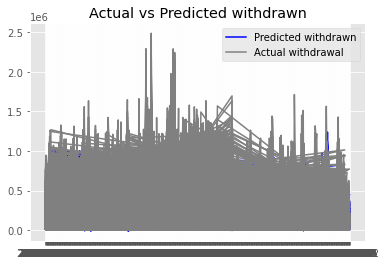

In [133]:
lgbPred = pd.DataFrame(lgb_pred)
lgbPred.index = y_test.index
plt.plot(lgbPred, color = 'blue', label = 'Predicted withdrawn')
plt.plot(y_test, color='gray', label = 'Actual withdrawal')
plt.legend(loc='best')
plt.title('Actual vs Predicted withdrawn')
plt.show()

In [134]:
lgb_pred

array([257873.03599842, 254159.5248708 , 343647.1058074 , ...,
       351828.96519567, 343636.50030952, 326264.16185082])

In [135]:
gbm.predict(X_test.iloc[[0]])

array([257873.03599842])

In [136]:
X_test.iloc[[0]]

,prv_week,prv_month,Pr_mnt_crrs_week,District,Branch,Terminal,trxn_month,trxn_week,trxn_date,HOLIDAY,hol_sequence
TXN_DATE,,,,,,,,,,,
2021-05-27,243853,232568,243853,24,29,2558,5,21,3,1,6


In [137]:
y_test[-1:]

TXN_DATE
2022-08-31    219100
Name: WITHDRAWAL, dtype: int64

In [138]:
mean_lgb_test = y_test.mean()
mean_lgb_pred = lgb_pred.mean()
print(mean_lgb_test, mean_lgb_pred)

accuracy = (mean_lgb_pred / mean_lgb_test)*100
print(round(accuracy,2))

262126.62942330196 259558.46937749156
99.02


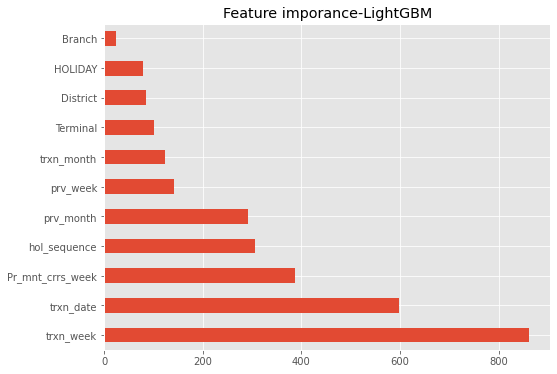

In [139]:
feat_imp = pd.Series(gbm.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8, 6))
plt.title('Feature imporance-LightGBM')
plt.show()

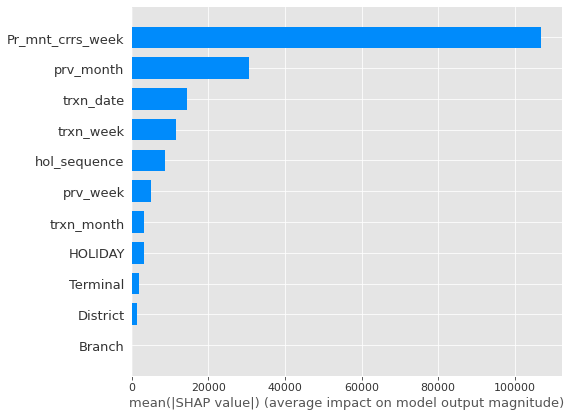

In [140]:
shap_values = shap.TreeExplainer(gbm).shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# CatBoost

In [141]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle= False, test_size = 0.2, random_state = 42)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  1213457 303365
length of y_train and y_test:  1213457 303365


In [142]:
cat = CatBoostRegressor(random_seed=42)
start = time()
cat.fit(X_train, y_train,cat_features = cat_cols,eval_set=[(X_test, y_test)],
        early_stopping_rounds=10, verbose=50,plot=True)
cat_elapse = time() - start
print('elapse:, ', cat_elapse)
print(); print(cat)

# make predictions
cat_pred = cat.predict(X_test)

A Jupyter Widget

Learning rate set to 0.15527
0:	learn: 165964.2966461	test: 210056.4331099	best: 210056.4331099 (0)	total: 2.21s	remaining: 36m 47s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 203120.0213
bestIteration = 15

Shrink model to first 16 iterations.
elapse:,  51.4021692276001



In [143]:
catpred = pd.DataFrame(cat_pred[-50:])
catpred.rename(columns = {0: 'cat_predicted'}, inplace=True)
catpred = catpred.round(decimals=0)
catpred.index = d.index
catok = pd.concat([catpred, d], axis=1)
catok['accuracy'] = round(catok.apply(lambda row: row.cat_predicted / 
                                            row.WITHDRAWAL *100, axis = 1),2)
catok['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in catok['accuracy']], 
                                     index = catok.index)
catok = catok.assign(day_of_week = lambda x: x.index.day_name())
catok

,cat_predicted,WITHDRAWAL,TERMINAL_ID,DISTRICTNAME,BRANCHNAME,accuracy,day_of_week
TXN_DATE,,,,,,,
2022-07-09,246857.0,98900,AYK00109,YEKA,Yeka Terara,249.60%,Saturday
2022-07-10,208566.0,318900,AYK00109,YEKA,Yeka Terara,65.40%,Sunday
2022-07-11,234157.0,291500,AYK00109,YEKA,Yeka Terara,80.33%,Monday
2022-07-12,224940.0,279300,AYK00109,YEKA,Yeka Terara,80.54%,Tuesday
2022-07-13,224940.0,365700,AYK00109,YEKA,Yeka Terara,61.51%,Wednesday
2022-07-14,224940.0,98900,AYK00109,YEKA,Yeka Terara,227.44%,Thursday
2022-07-15,219102.0,129300,AYK00109,YEKA,Yeka Terara,169.45%,Friday
2022-07-16,252017.0,356500,AYK00109,YEKA,Yeka Terara,70.69%,Saturday
2022-07-17,202084.0,98900,AYK00109,YEKA,Yeka Terara,204.33%,Sunday


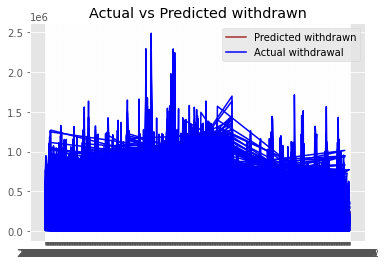

In [144]:
catPred = pd.DataFrame(cat_pred)
catPred.index = y_test.index
plt.plot(catPred, color = 'brown', label = 'Predicted withdrawn')
plt.plot(y_test, color='blue', label = 'Actual withdrawal')
plt.legend(loc='best')
plt.title('Actual vs Predicted withdrawn')
plt.show()

In [145]:
mean_cat_test = y_test.mean()
mean_cat_pred = cat_pred.mean()
print(mean_cat_test, mean_cat_pred)

accuracy = (mean_cat_pred / mean_cat_test)*100
print('accuracy:', round(accuracy,2))

262126.62942330196 216351.94823100528
accuracy: 82.54


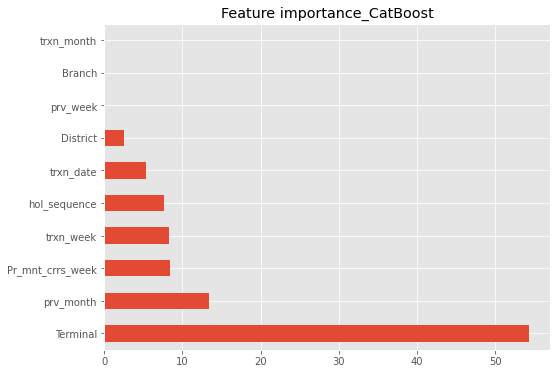

In [146]:
featimp = pd.Series(cat.feature_importances_, index=X.columns)
featimp.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title('Feature importance_CatBoost')
plt.show()

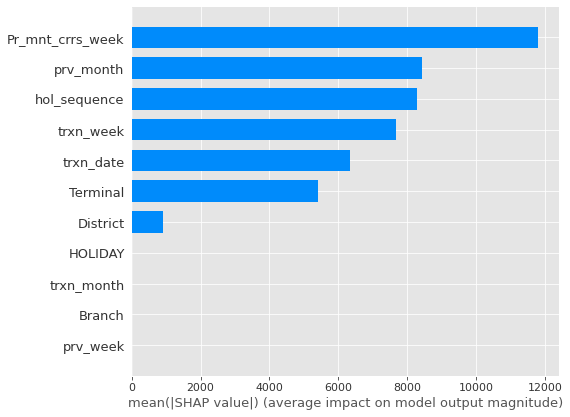

In [147]:
shap_values = shap.TreeExplainer(cat).shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [148]:
catpred = pd.DataFrame(cat_pred[-50:])
catpred.rename(columns = {0: 'cat_predicted'}, inplace=True)
catpred = catpred.round(decimals=0)
catpred.index = d.index
catok = pd.concat([catpred['cat_predicted'], d['WITHDRAWAL'].tail(50)], axis=1, ignore_index=True, sort=False)
catok

,0,1
TXN_DATE,,
2022-07-09,246857.0,98900
2022-07-10,208566.0,318900
2022-07-11,234157.0,291500
2022-07-12,224940.0,279300
2022-07-13,224940.0,365700
2022-07-14,224940.0,98900
2022-07-15,219102.0,129300
2022-07-16,252017.0,356500
2022-07-17,202084.0,98900


In [155]:
catok.rename(columns = {0:'cat_predicted',1:'WITHDRAWAL'}, inplace=True)
catok

,cat_predicted,WITHDRAWAL
TXN_DATE,,
2022-07-09,246857.0,98900
2022-07-10,208566.0,318900
2022-07-11,234157.0,291500
2022-07-12,224940.0,279300
2022-07-13,224940.0,365700
2022-07-14,224940.0,98900
2022-07-15,219102.0,129300
2022-07-16,252017.0,356500
2022-07-17,202084.0,98900


In [154]:
catpred

,cat_predicted
TXN_DATE,
2022-07-09,246857.0
2022-07-10,208566.0
2022-07-11,234157.0
2022-07-12,224940.0
2022-07-13,224940.0
2022-07-14,224940.0
2022-07-15,219102.0
2022-07-16,252017.0
2022-07-17,202084.0


In [156]:
catok['accuracy'] = round(catok.apply(lambda row: row.cat_predicted / row.WITHDRAWAL *100, axis = 1),2)
catok['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in catok['accuracy']], index = catok.index)
catok = catok.assign(day_of_week = lambda x: x.index.day_name())
catok



,cat_predicted,WITHDRAWAL,accuracy,day_of_week
TXN_DATE,,,,
2022-07-09,246857.0,98900,249.60%,Saturday
2022-07-10,208566.0,318900,65.40%,Sunday
2022-07-11,234157.0,291500,80.33%,Monday
2022-07-12,224940.0,279300,80.54%,Tuesday
2022-07-13,224940.0,365700,61.51%,Wednesday
2022-07-14,224940.0,98900,227.44%,Thursday
2022-07-15,219102.0,129300,169.45%,Friday
2022-07-16,252017.0,356500,70.69%,Saturday
2022-07-17,202084.0,98900,204.33%,Sunday


In [163]:
report = pd.concat([ catok['cat_predicted'], lgbok['lgb_predicted'], xgbok['xgb_predicted'],ngbok['ngb_predicted'], linok], axis=1)
report.drop(columns=['accuracy'], axis=1, inplace=True)
report


,cat_predicted,lgb_predicted,xgb_predicted,ngb_predicted,lin_predicted,WITHDRAWAL,TERMINAL_ID,DISTRICTNAME,BRANCHNAME,day_of_week
TXN_DATE,,,,,,,,,,
2022-07-09,246857.0,317705.0,305441.0,316579.0,244418.0,98900,AYK00109,YEKA,Yeka Terara,Saturday
2022-07-10,208566.0,222682.0,202654.0,247341.0,267603.0,318900,AYK00109,YEKA,Yeka Terara,Sunday
2022-07-11,234157.0,319218.0,308788.0,305890.0,305308.0,291500,AYK00109,YEKA,Yeka Terara,Monday
2022-07-12,224940.0,300254.0,277965.0,298174.0,291893.0,279300,AYK00109,YEKA,Yeka Terara,Tuesday
2022-07-13,224940.0,296247.0,275334.0,296998.0,299392.0,365700,AYK00109,YEKA,Yeka Terara,Wednesday
2022-07-14,224940.0,296247.0,281690.0,296998.0,306891.0,98900,AYK00109,YEKA,Yeka Terara,Thursday
2022-07-15,219102.0,242931.0,223107.0,251946.0,255883.0,129300,AYK00109,YEKA,Yeka Terara,Friday
2022-07-16,252017.0,274380.0,272651.0,303791.0,268611.0,356500,AYK00109,YEKA,Yeka Terara,Saturday
2022-07-17,202084.0,178792.0,166978.0,207370.0,203994.0,98900,AYK00109,YEKA,Yeka Terara,Sunday


In [165]:
# Save the trained model as a pickle string.
ngb_saved_model = pickle.dumps(ngb)
  
# Load the pickled model
ngb_from_pickle = pickle.loads(ngb_saved_model)
  
# Use the loaded pickled model to make predictions
ngb_from_pickle.predict(X_test[-50:])

array([316579.36193348, 247341.48739985, 305889.5041967 , 298174.00143765,
       296998.41483377, 296998.41483377, 251946.07863071, 303790.76480505,
       207370.03858979, 261017.88444514, 253121.66523459, 251946.07863071,
       251946.07863071, 248084.00347768, 283430.95041107, 257295.13676574,
       249259.59008156, 248084.00347768, 248084.00347768, 236458.82654699,
       267259.80793774, 179686.28477755, 229004.80377453, 222637.03770645,
       221461.45110257, 253488.44695221, 147035.41531257, 207288.19584679,
       203130.1577537 , 201954.57114982, 201954.57114982, 313106.67083996,
       393277.88869208, 308469.2463743 , 299055.21026319, 297879.62365931,
       297879.62365931, 245380.29090771, 306668.60261817, 202066.44137929,
       258420.92290647, 250044.13211476, 248868.54551088, 248868.54551088,
       334805.04103144, 436474.79741344, 274035.43999354, 322095.22188942,
       315266.6395088 , 314091.05290492])

In [166]:
# Save the trained model as a pickle string.
linear_saved_model = pickle.dumps(linear)
  
# Load the pickled model
linear_from_pickle = pickle.loads(linear_saved_model)
  
# Use the loaded pickled model to make predictions
linear_from_pickle.predict(X_test[-50:])

array([244418.27020036, 267603.08129565, 305307.83812527, 291892.80098274,
       299391.96283324, 306891.12468375, 255883.42009145, 268611.13169021,
       203994.44349176, 263582.80087329, 250167.76373076, 257666.92558126,
       265166.08743177, 263649.39044277, 276377.10204154, 256701.76984227,
       243286.73269974, 250785.89455025, 258285.05640076, 248612.58807105,
       261340.29966982, 196723.61147136, 229818.3712888 , 216403.33414627,
       223902.49599678, 251628.53129656, 166194.04431891, 214628.21727581,
       201213.18013328, 208712.34198379, 216211.50383429, 369978.25012233,
       382705.96172109, 317074.06249124, 303659.02534871, 311158.18719921,
       318657.34904972, 244201.38352238, 256929.09512114, 192312.40692269,
       258840.34236013, 245425.3052176 , 252924.46706811, 260423.62891861,
       376437.72130771, 389165.43290647, 324548.74470802, 334706.53662448,
       321291.49948195, 328790.66133246])

In [ ]:
#y_test[-50:]

In [167]:
# Save the trained model as a pickle string.
xgb_saved_model = pickle.dumps(xgb)
  
# Load the pickled model
xgb_from_pickle = pickle.loads(xgb_saved_model)
  
# Use the loaded pickled model to make predictions
xgb_from_pickle.predict(X_test[-50:])

array([305440.8 , 202653.69, 308787.7 , 277965.2 , 275334.38, 281689.62,
       223106.98, 272650.88, 166978.44, 230897.38, 227273.8 , 226704.48,
       235043.56, 231113.23, 272848.06, 233884.17, 237716.44, 237147.12,
       245486.2 , 219134.23, 261619.05, 167017.36, 262255.12, 276377.9 ,
       273301.84, 266616.8 , 134971.3 , 216931.64, 208749.5 , 211505.84,
       219824.33, 317133.25, 386876.5 , 217066.92, 205652.98, 181403.92,
       187759.17, 223257.81, 316733.84, 181964.03, 239427.39, 230300.05,
       223515.22, 231854.3 , 326104.1 , 434532.8 , 201330.36, 274362.34,
       272392.62, 248143.6 ], dtype=float32)

In [170]:
# Save the trained model as a pickle string.
lgb_saved_model = pickle.dumps(gbm)
  
# Load the pickled model
lgb_from_pickle = pickle.loads(lgb_saved_model)
  
# Use the loaded pickled model to make predictions
lgb_from_pickle.predict(X_test[-50:])

array([317704.89179279, 222682.44209304, 319218.21387306, 300253.80993007,
       296247.38228856, 296247.38228856, 242931.43779121, 274379.60709571,
       178791.71328654, 259016.21282307, 250617.19351808, 248042.38937732,
       248042.38937732, 236641.17027476, 267414.83610364, 255270.44952892,
       254366.27868338, 251791.47454262, 251791.47454262, 227162.79468871,
       253551.40350848, 166801.72368632, 242476.74823928, 256109.47045604,
       253534.66631528, 257842.20043346, 140188.15098872, 210915.62182235,
       204653.14259034, 204019.79517714, 204019.79517714, 360205.98750229,
       439973.54061091, 296664.36478987, 282838.30053424, 270781.57453632,
       270781.57453632, 238533.33173849, 315785.03805244, 195220.03671679,
       260216.28771821, 246505.51174898, 243051.39946224, 243051.39946224,
       360102.14392289, 465850.91054909, 264658.37540839, 351828.96519567,
       343636.50030952, 326264.16185082])

In [168]:
# Save the trained model as a pickle string.
cat_saved_model = pickle.dumps(cat)
  
# Load the pickled model
cat_from_pickle = pickle.loads(cat_saved_model)
  
# Use the loaded pickled model to make predictions
cat_from_pickle.predict(X_test[-50:])

array([246857.29872813, 208565.62905266, 234156.79939036, 224939.87860843,
       224939.87860843, 224939.87860843, 219101.8844936 , 252016.51613697,
       202084.23113579, 213520.95372173, 210785.82729178, 207777.17972644,
       207777.17972644, 207777.17972644, 240069.11958287, 219101.8844936 ,
       207777.17972644, 207777.17972644, 207777.17972644, 213520.95372173,
       252016.51613697, 197327.32472696, 222181.33214281, 227689.28644498,
       229880.41033486, 264204.11657082, 175790.48859281, 202721.49021443,
       197213.53591226, 196687.13674241, 196687.13674241, 235240.61824878,
       273754.51671026, 235240.61824878, 226924.56104696, 223915.91348162,
       223915.91348162, 195942.77888363, 241594.71173946, 184259.6361867 ,
       207267.48365079, 195942.77888363, 195942.77888363, 195942.77888363,
       223915.91348162, 273754.51671026, 207884.12954524, 238949.58472854,
       244457.53903071, 240748.57255094])

In [177]:

# Save the model as a pickle in a file
joblib.dump(ngb, 'ngb2.pkl')
  
# Load the model from the file
ngb_from_joblib = joblib.load('ngb2.pkl')
  
# Use the loaded model to make predictions
ngb_from_joblib.predict(X_test[-50:])

array([316579.36193348, 247341.48739985, 305889.5041967 , 298174.00143765,
       296998.41483377, 296998.41483377, 251946.07863071, 303790.76480505,
       207370.03858979, 261017.88444514, 253121.66523459, 251946.07863071,
       251946.07863071, 248084.00347768, 283430.95041107, 257295.13676574,
       249259.59008156, 248084.00347768, 248084.00347768, 236458.82654699,
       267259.80793774, 179686.28477755, 229004.80377453, 222637.03770645,
       221461.45110257, 253488.44695221, 147035.41531257, 207288.19584679,
       203130.1577537 , 201954.57114982, 201954.57114982, 313106.67083996,
       393277.88869208, 308469.2463743 , 299055.21026319, 297879.62365931,
       297879.62365931, 245380.29090771, 306668.60261817, 202066.44137929,
       258420.92290647, 250044.13211476, 248868.54551088, 248868.54551088,
       334805.04103144, 436474.79741344, 274035.43999354, 322095.22188942,
       315266.6395088 , 314091.05290492])

In [173]:

# Save the model as a pickle in a file
joblib.dump(linear, 'linear_reg2.pkl')
  
# Load the model from the file
linear_from_joblib = joblib.load('linear_reg2.pkl')
  
# Use the loaded model to make predictions
linear_from_joblib.predict(X_test[-50:])

array([244418.27020036, 267603.08129565, 305307.83812527, 291892.80098274,
       299391.96283324, 306891.12468375, 255883.42009145, 268611.13169021,
       203994.44349176, 263582.80087329, 250167.76373076, 257666.92558126,
       265166.08743177, 263649.39044277, 276377.10204154, 256701.76984227,
       243286.73269974, 250785.89455025, 258285.05640076, 248612.58807105,
       261340.29966982, 196723.61147136, 229818.3712888 , 216403.33414627,
       223902.49599678, 251628.53129656, 166194.04431891, 214628.21727581,
       201213.18013328, 208712.34198379, 216211.50383429, 369978.25012233,
       382705.96172109, 317074.06249124, 303659.02534871, 311158.18719921,
       318657.34904972, 244201.38352238, 256929.09512114, 192312.40692269,
       258840.34236013, 245425.3052176 , 252924.46706811, 260423.62891861,
       376437.72130771, 389165.43290647, 324548.74470802, 334706.53662448,
       321291.49948195, 328790.66133246])

In [174]:

# Save the model as a pickle in a file
joblib.dump(xgb, 'xgb2.pkl')
  
# Load the model from the file
xgb_from_joblib = joblib.load('xgb2.pkl')
  
# Use the loaded model to make predictions
xgb_from_joblib.predict(X_test[-50:])

array([305440.8 , 202653.69, 308787.7 , 277965.2 , 275334.38, 281689.62,
       223106.98, 272650.88, 166978.44, 230897.38, 227273.8 , 226704.48,
       235043.56, 231113.23, 272848.06, 233884.17, 237716.44, 237147.12,
       245486.2 , 219134.23, 261619.05, 167017.36, 262255.12, 276377.9 ,
       273301.84, 266616.8 , 134971.3 , 216931.64, 208749.5 , 211505.84,
       219824.33, 317133.25, 386876.5 , 217066.92, 205652.98, 181403.92,
       187759.17, 223257.81, 316733.84, 181964.03, 239427.39, 230300.05,
       223515.22, 231854.3 , 326104.1 , 434532.8 , 201330.36, 274362.34,
       272392.62, 248143.6 ], dtype=float32)

In [175]:
# Save the model as a pickle in a file
joblib.dump(gbm, 'lgbm2.pkl')
  
# Load the model from the file
lgbm_from_joblib = joblib.load('lgbm2.pkl')
  
# Use the loaded model to make predictions
lgbm_from_joblib.predict(X_test[-50:])

array([317704.89179279, 222682.44209304, 319218.21387306, 300253.80993007,
       296247.38228856, 296247.38228856, 242931.43779121, 274379.60709571,
       178791.71328654, 259016.21282307, 250617.19351808, 248042.38937732,
       248042.38937732, 236641.17027476, 267414.83610364, 255270.44952892,
       254366.27868338, 251791.47454262, 251791.47454262, 227162.79468871,
       253551.40350848, 166801.72368632, 242476.74823928, 256109.47045604,
       253534.66631528, 257842.20043346, 140188.15098872, 210915.62182235,
       204653.14259034, 204019.79517714, 204019.79517714, 360205.98750229,
       439973.54061091, 296664.36478987, 282838.30053424, 270781.57453632,
       270781.57453632, 238533.33173849, 315785.03805244, 195220.03671679,
       260216.28771821, 246505.51174898, 243051.39946224, 243051.39946224,
       360102.14392289, 465850.91054909, 264658.37540839, 351828.96519567,
       343636.50030952, 326264.16185082])

In [176]:
# Save the model as a pickle in a file
joblib.dump(linear, 'cat2.pkl')
  
# Load the model from the file
cat_from_joblib = joblib.load('cat2.pkl')
  
# Use the loaded model to make predictions
cat_from_joblib.predict(X_test[-50:])

array([244418.27020036, 267603.08129565, 305307.83812527, 291892.80098274,
       299391.96283324, 306891.12468375, 255883.42009145, 268611.13169021,
       203994.44349176, 263582.80087329, 250167.76373076, 257666.92558126,
       265166.08743177, 263649.39044277, 276377.10204154, 256701.76984227,
       243286.73269974, 250785.89455025, 258285.05640076, 248612.58807105,
       261340.29966982, 196723.61147136, 229818.3712888 , 216403.33414627,
       223902.49599678, 251628.53129656, 166194.04431891, 214628.21727581,
       201213.18013328, 208712.34198379, 216211.50383429, 369978.25012233,
       382705.96172109, 317074.06249124, 303659.02534871, 311158.18719921,
       318657.34904972, 244201.38352238, 256929.09512114, 192312.40692269,
       258840.34236013, 245425.3052176 , 252924.46706811, 260423.62891861,
       376437.72130771, 389165.43290647, 324548.74470802, 334706.53662448,
       321291.49948195, 328790.66133246])

In [ ]:
df